 대전 기후와 관광 분석(초안)
 --

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

daejeon=pd.read_csv('대전기후와관광.csv', parse_dates=['year_month'])

In [ ]:
daejeon=daejeon.set_index('year_month')

In [ ]:
daejeon_weather=daejeon.iloc[:, :58]
daejeon_tour=daejeon.iloc[:, 58:]

In [ ]:
daejeon_weather.head()

평균 기온(°C)  최저 기온(°C)  ...  9-9강수(mm)  안개 계속 시간(hr)
year_month                        ...                         
201101      -5.706452 -10.370968  ...   0.129032         0.000
201102       1.771429  -3.310714  ...   1.707143         0.265
201103       4.496774  -0.661290  ...   0.516129         0.000
201104      11.636667   5.856667  ...   2.466667         0.000
201105      18.145161  13.141935  ...   5.290323         0.000

[5 rows x 58 columns]

In [ ]:
daejeon_tour.head()

만인산자연휴양림  상소오토캠핑장    세천유원지  ...      대청호  로하스가족공원 캠핑장   장동삼림욕장
year_month                              ...                               
201101        4100.0      NaN   4100.0  ...  55909.0          NaN  76208.0
201102        3900.0      NaN   3900.0  ...  36450.0          NaN  40650.0
201103        4000.0      NaN   4000.0  ...  16470.0          NaN  23205.0
201104       24600.0      NaN  19800.0  ...  28065.0          NaN  31515.0
201105       18800.0      NaN  19075.0  ...  86890.0          NaN  88250.0

[5 rows x 42 columns]

2011년 1월부터 2019년 12월까지 전부 있는 칼럼

In [ ]:
# 2011년 1월부터 2019년 12월까지 전부 있는 칼럼
dj_1=daejeon_tour.dropna(axis=1)
dj_1

한밭교육박물관     대전오월드   계룡산 수통골   국립중앙과학관   지질박물관
year_month                                               
201101        100.0    7335.0   25330.0   79251.0  7375.0
201102        226.0   26175.0   34116.0   73591.0  3635.0
201103        516.0   65177.0   38547.0   57815.0  2789.0
201104        211.0  171794.0   36226.0  186133.0  6840.0
201105        360.0  213740.0   38242.0  163611.0  6690.0
...             ...       ...       ...       ...     ...
201908       1647.0   57721.0   85577.0  158881.0  6209.0
201909       5491.0   66082.0   78944.0  157633.0  2911.0
201910       2813.0  148600.0  119600.0  137386.0  4221.0
201911       2258.0   52131.0  107300.0   75532.0  4548.0
201912       2312.0   26374.0   72600.0   73972.0  3241.0

[108 rows x 5 columns]

모든 칼럼을 다준 것과 평균 기온, 최고 기온, 최소 상대습도 평균 상대습도, 일강수량, 평균풍속, 합계 일조시간만 준 것으로 statsmodel으로 비교해본 결과 후자가 더 좋았음.

In [ ]:
df=daejeon[['평균 기온(°C)','최고 기온(°C)','최소 상대습도(%)', '평균 상대습도(%)','일강수량(mm)','평균 풍속(m/s)','합계 일조 시간(hr)','한밭교육박물관',
       '대전오월드', '계룡산 수통골', '국립중앙과학관', '지질박물관']]

In [ ]:
df

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...   계룡산 수통골   국립중앙과학관   지질박물관
year_month                                    ...                            
201101      -5.706452  -0.590323   32.322581  ...   25330.0   79251.0  7375.0
201102       1.771429   7.642857   31.035714  ...   34116.0   73591.0  3635.0
201103       4.496774  10.493548   21.193548  ...   38547.0   57815.0  2789.0
201104      11.636667  17.733333   25.500000  ...   36226.0  186133.0  6840.0
201105      18.145161  23.580645   34.258065  ...   38242.0  163611.0  6690.0
...               ...        ...         ...  ...       ...       ...     ...
201908      27.203226  31.635484   57.032258  ...   85577.0  158881.0  6209.0
201909      22.486667  26.773333   62.166667  ...   78944.0  157633.0  2911.0
201910      16.200000  21.532258   51.193548  ...  119600.0  137386.0  4221.0
201911       8.650000  15.173333   44.266667  ...  107300.0   75532.0  4548.0
201912       2.554839   7.893548   43.387097  ...   72600.0   73972.0  3241.0

[108 rows x 12 columns]

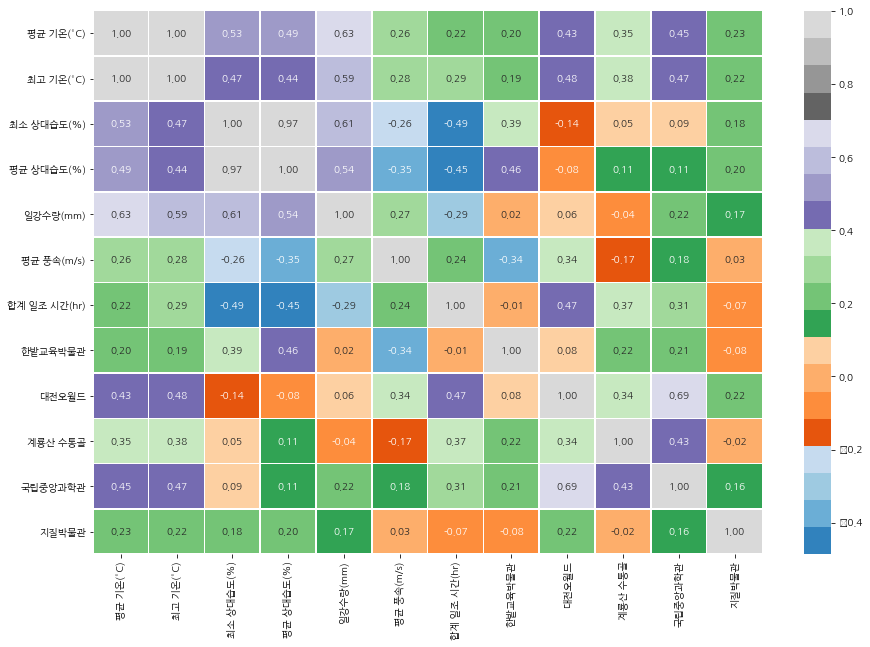

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='tab20c')
plt.show()

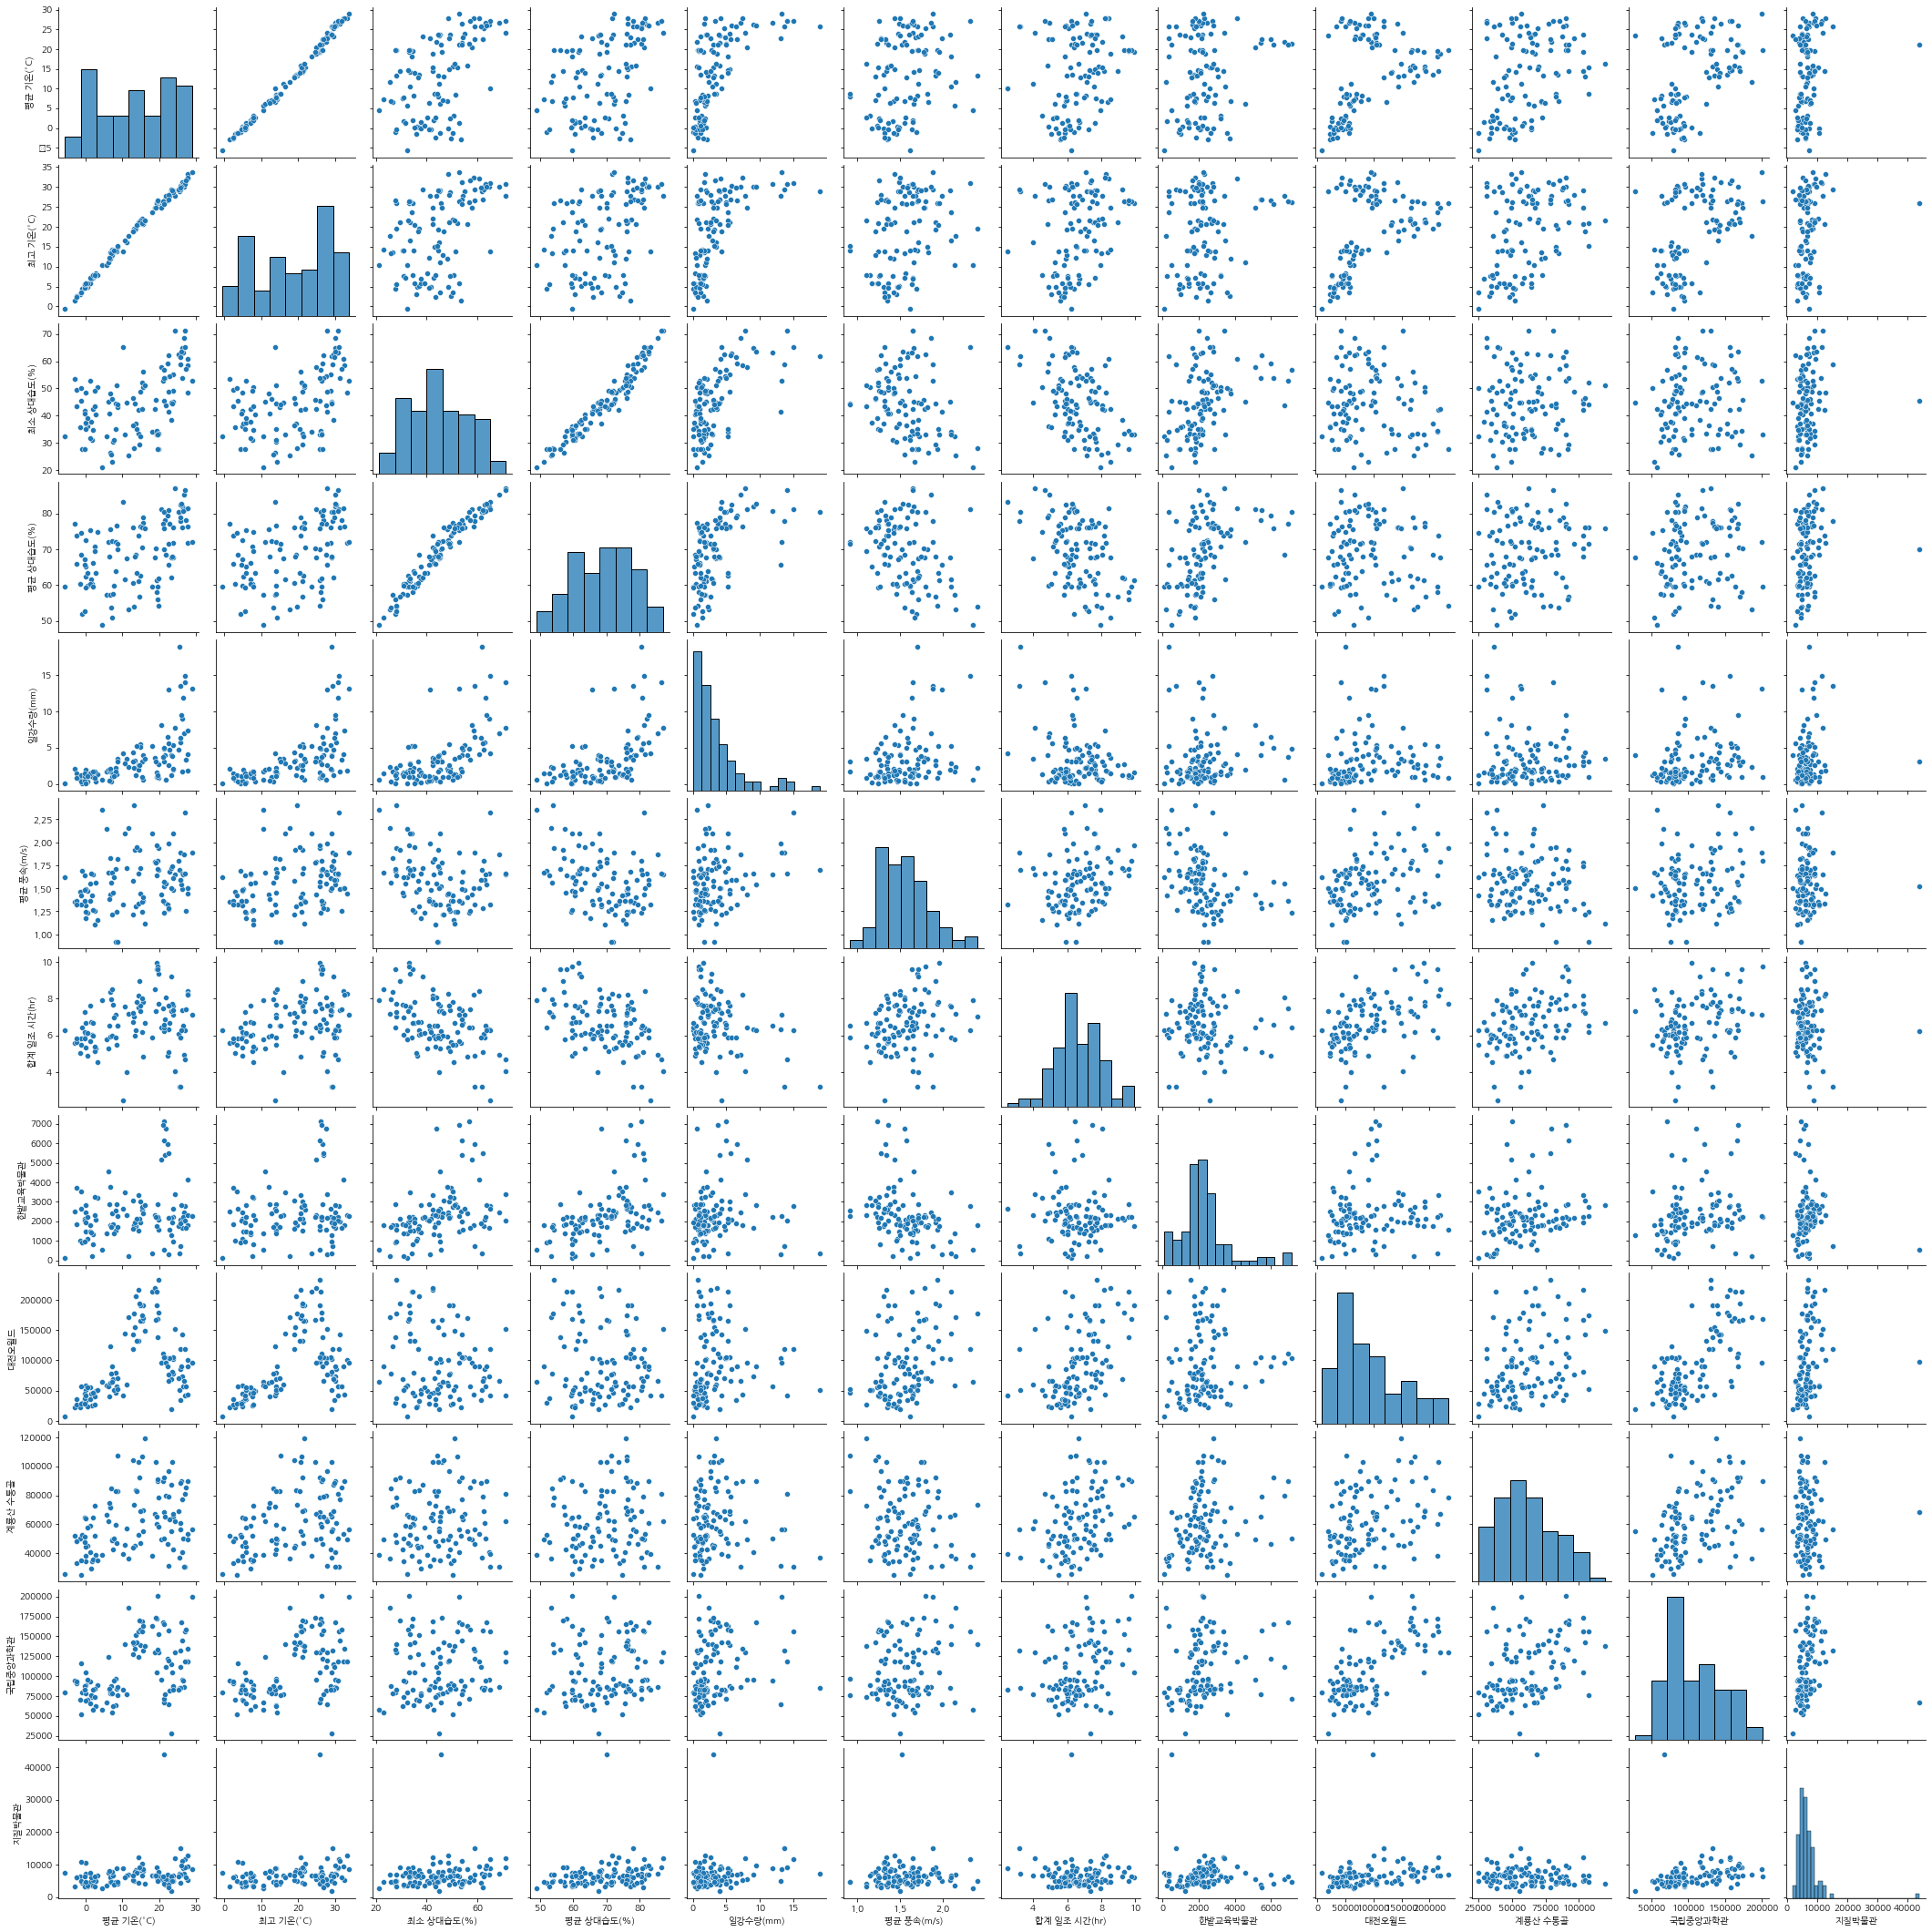

In [ ]:
sns.pairplot(df)

In [ ]:
df['합계']=0
df['합계']=df.iloc[:, 7]+df.iloc[:, 8]+df.iloc[:, 9]+df.iloc[:, 10]+df.iloc[:, 11]

In [ ]:
df

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...   국립중앙과학관   지질박물관        합계
year_month                                    ...                            
201101      -5.706452  -0.590323   32.322581  ...   79251.0  7375.0  119391.0
201102       1.771429   7.642857   31.035714  ...   73591.0  3635.0  137743.0
201103       4.496774  10.493548   21.193548  ...   57815.0  2789.0  164844.0
201104      11.636667  17.733333   25.500000  ...  186133.0  6840.0  401204.0
201105      18.145161  23.580645   34.258065  ...  163611.0  6690.0  422643.0
...               ...        ...         ...  ...       ...     ...       ...
201908      27.203226  31.635484   57.032258  ...  158881.0  6209.0  310035.0
201909      22.486667  26.773333   62.166667  ...  157633.0  2911.0  311061.0
201910      16.200000  21.532258   51.193548  ...  137386.0  4221.0  412620.0
201911       8.650000  15.173333   44.266667  ...   75532.0  4548.0  241769.0
201912       2.554839   7.893548   43.387097  ...   73972.0  3241.0  178499.0

[108 rows x 13 columns]

In [ ]:
df.columns

Index(['평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '합계'],
      dtype='object')

[Text(0, 0.5, '합계'), Text(0.5, 1.0, '평균 상대습도(%)')]

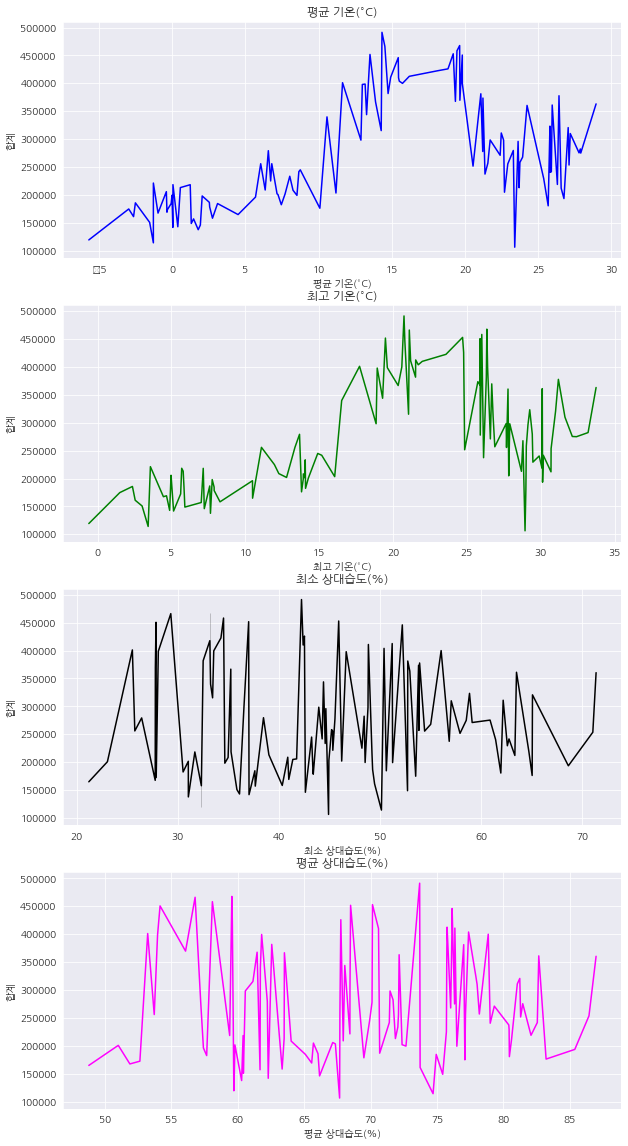

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(10,20)


sns.lineplot(data=df, x='평균 기온(°C)', y='합계', ax=ax1, color='blue')

sns.lineplot(data=df, x='최고 기온(°C)', y='합계', ax=ax2, color='green')

sns.lineplot(data=df, x='최소 상대습도(%)', y='합계', ax=ax3, color='black')

sns.lineplot(data=df, x='평균 상대습도(%)', y='합계', ax=ax4, color='magenta')


sns.set_style('darkgrid')
ax1.set(ylabel="합계", title="평균 기온(°C)")
ax2.set(ylabel="합계", title="최고 기온(°C)")
ax3.set(ylabel="합계", title="최소 상대습도(%)")
ax4.set(ylabel="합계", title="평균 상대습도(%)")

[Text(0, 0.5, '합계'), Text(0.5, 1.0, '최소 상대습도(%)')]

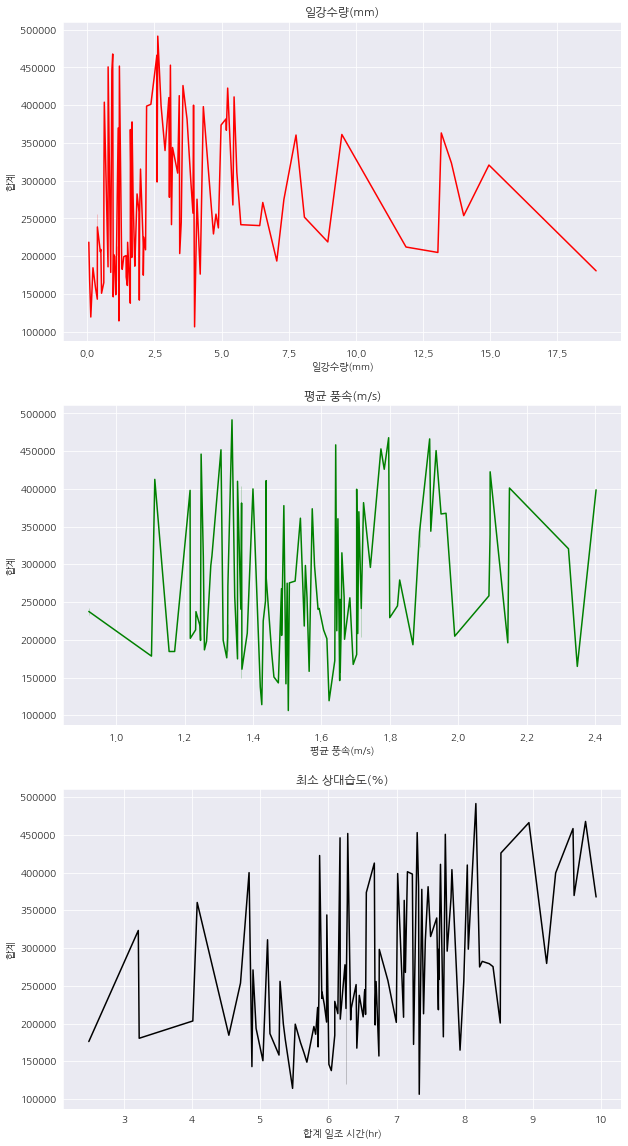

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(10,20)


sns.lineplot(data=df, x='일강수량(mm)', y='합계', ax=ax1, color='red')

sns.lineplot(data=df, x='평균 풍속(m/s)', y='합계', ax=ax2, color='green')

sns.lineplot(data=df, x='합계 일조 시간(hr)', y='합계', ax=ax3, color='black')

sns.set_style('darkgrid')
ax1.set(ylabel="합계", title='일강수량(mm)')
ax2.set(ylabel="합계", title="평균 풍속(m/s)")
ax3.set(ylabel="합계", title="최소 상대습도(%)")

In [ ]:
df.columns

Index(['평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '합계'],
      dtype='object')

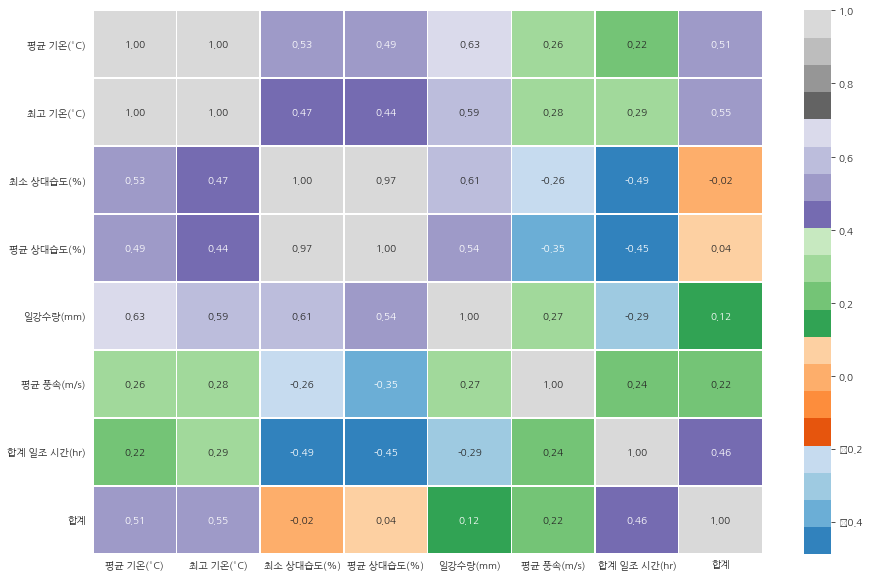

In [ ]:
df_2=df[['평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계']]

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df_2.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='tab20c')
plt.show()

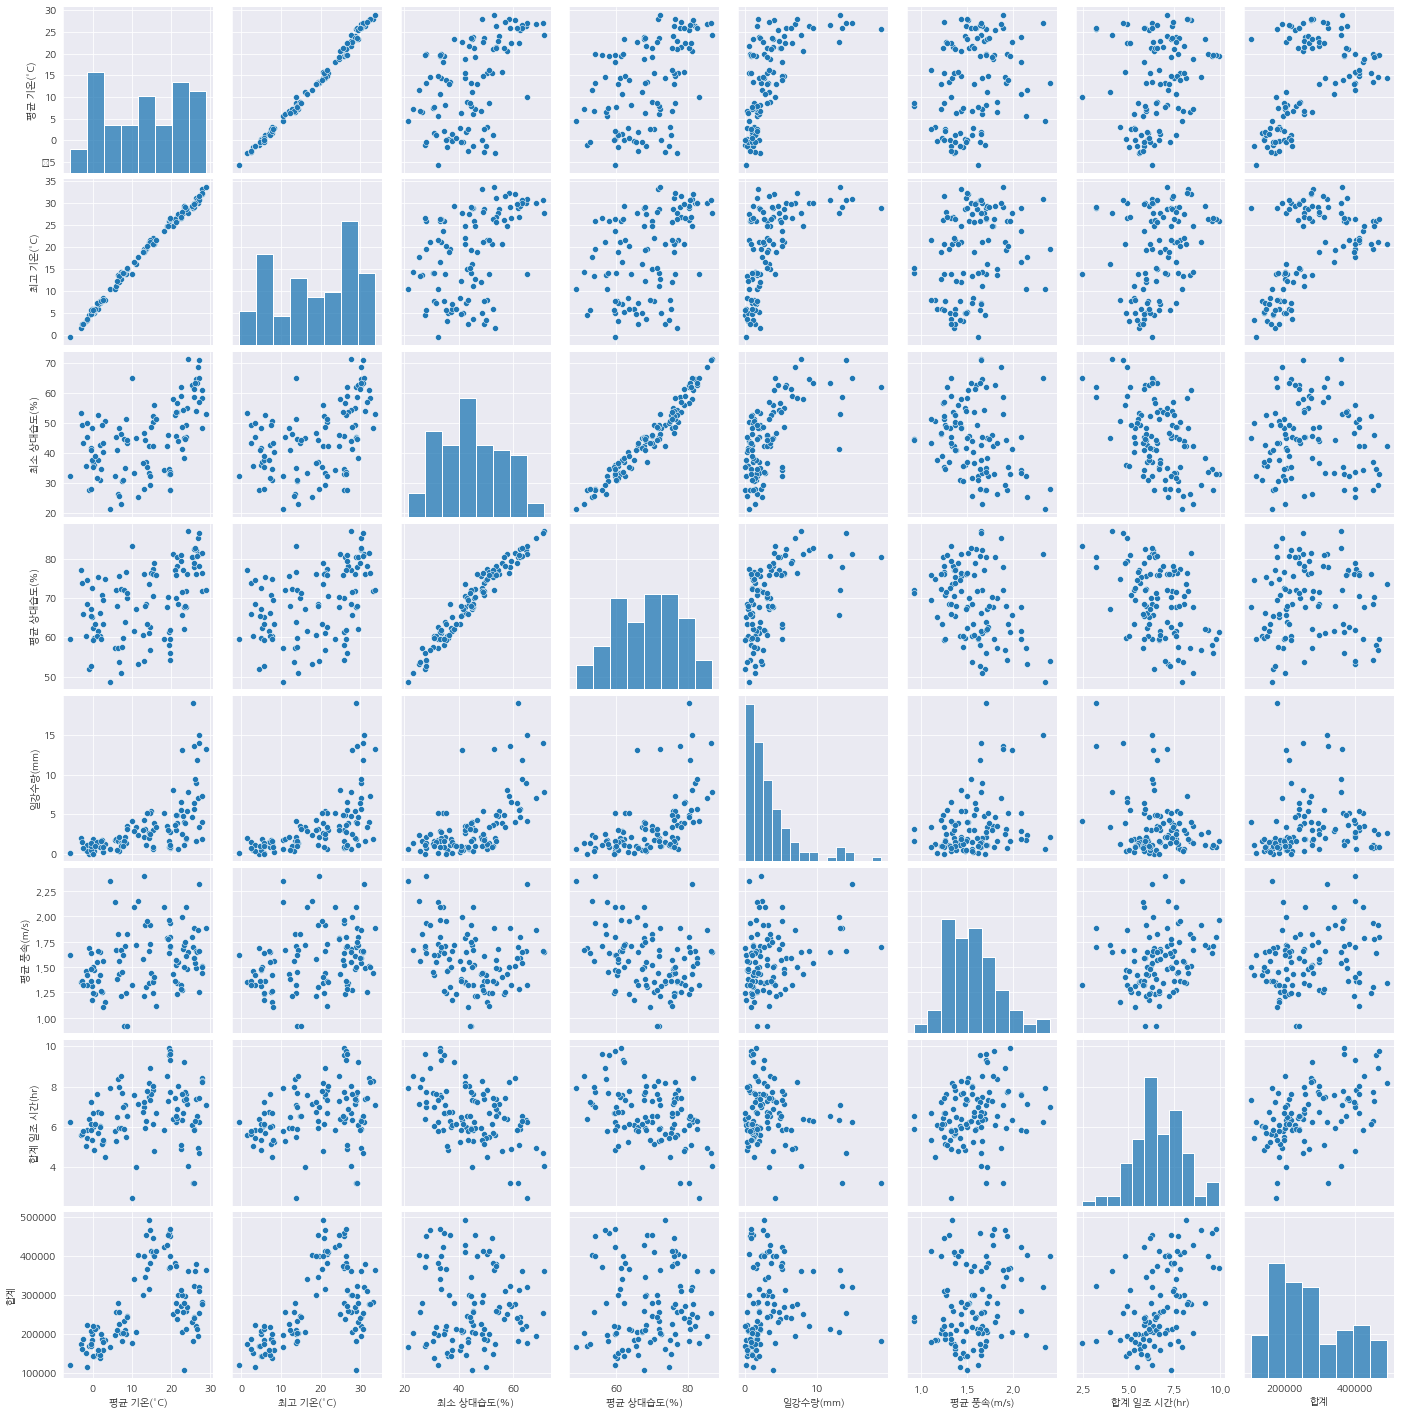

In [ ]:
sns.pairplot(df_2)

관광지 년도별 정리
--

In [ ]:
daejeon_tour

만인산자연휴양림  상소오토캠핑장    세천유원지  ...      대청호  로하스가족공원 캠핑장   장동삼림욕장
year_month                              ...                               
201101        4100.0      NaN   4100.0  ...  55909.0          NaN  76208.0
201102        3900.0      NaN   3900.0  ...  36450.0          NaN  40650.0
201103        4000.0      NaN   4000.0  ...  16470.0          NaN  23205.0
201104       24600.0      NaN  19800.0  ...  28065.0          NaN  31515.0
201105       18800.0      NaN  19075.0  ...  86890.0          NaN  88250.0
...              ...      ...      ...  ...      ...          ...      ...
201908           NaN   3108.0      NaN  ...      NaN       3800.0      NaN
201909           NaN   1704.0      NaN  ...      NaN       2836.0      NaN
201910           NaN   2840.0      NaN  ...      NaN       3336.0      NaN
201911           NaN      0.0      NaN  ...      NaN       2368.0      NaN
201912           NaN      0.0      NaN  ...      NaN       1732.0      NaN

[108 rows x 42 columns]

2019년 결측치 없는 관광지

In [ ]:
daejeon_19=daejeon_tour.iloc[96:, :]
daejeon_19=daejeon_19.dropna(axis=1)
print(daejeon_19.columns)
print("관광지 개수: ", len(daejeon_19.columns))

Index(['상소오토캠핑장', '찬샘마을', '한밭교육박물관', '대전 아쿠아월드', '대전오월드', '뿌리공원', '남선공원종합체육관',
       '대전시립미술관', '장태산자연휴양림', '계룡산 수통골', '국립중앙과학관', '대전시민천문대', '대전어린이회관',
       '솔로몬 로파크', '유성유스호스텔', '지질박물관', '화폐박물관', '로하스가족공원 캠핑장'],
      dtype='object')
관광지 개수:  18


2018년 결측치 없는 관광지


In [ ]:
daejeon_18=daejeon_tour.iloc[84:96, :]
daejeon_18=daejeon_18.dropna(axis=1)
print(daejeon_18.columns)
print("관광지 개수: ", len(daejeon_18.columns))

Index(['상소오토캠핑장', '찬샘마을', '한밭교육박물관', '대전 아쿠아월드', '대전오월드', '뿌리공원', '남선공원종합체육관',
       '대전시립미술관', '장태산자연휴양림', '계룡산 수통골', '국립중앙과학관', '대전시민천문대', '대전어린이회관',
       '솔로몬 로파크', '유성유스호스텔', '지질박물관', '화폐박물관', '로하스가족공원 캠핑장'],
      dtype='object')
관광지 개수:  18


- 2018-2019년에는 결측치 없는 관광지에 변화가 없다.

2017년 결측치 없는 관광지

In [ ]:
daejeon_17=daejeon_tour.iloc[72:84, :]
daejeon_17=daejeon_17.dropna(axis=1)
print(daejeon_17.columns)
print("관광지 개수: ", len(daejeon_17.columns))

Index(['상소오토캠핑장', '찬샘마을', '한밭교육박물관', '대전 아쿠아월드', '대전오월드', '뿌리공원', '남선공원종합체육관',
       '대전시립미술관', '장태산자연휴양림', '계룡산 수통골', '국립중앙과학관', '대전시민천문대', '솔로몬 로파크',
       '유성유스호스텔', '지질박물관', '화폐박물관', '로하스가족공원 캠핑장'],
      dtype='object')
관광지 개수:  17


- 대전어린이회관이 2017년에는 없다.  

2016년 결측치 없는 관광지

In [ ]:
daejeon_16=daejeon_tour.iloc[60:72, :]
daejeon_16=daejeon_16.dropna(axis=1)
print(daejeon_16.columns)
print("관광지 개수: ", len(daejeon_16.columns))

Index(['상소오토캠핑장', '한밭교육박물관', '대전오월드', '뿌리공원', '대전시립미술관', '계룡산 수통골', '국립중앙과학관',
       '솔로몬 로파크', '유성유스호스텔', '지질박물관', '화폐박물관'],
      dtype='object')
관광지 개수:  11


- 없어진 관광지: 찬샘마을, 대전 아쿠아월드, 남산공원종합체육관, 장태산자연휴양림, 대전시민천문대, 로하스가족공원 캠핌장

- 여전히 남아있는 관광지: 상소오토캠핑장, 한밭교육박물관, 대전오월드, 뿌리공원, 대전시립미술관, 계룡산 수통골, 국립중앙과학관, 솔로몬 로파크, 유성유스호스텔, 지질박물관, 화폐박물관

2015년 결측치 없는 관광지

In [ ]:
daejeon_15=daejeon_tour.iloc[48:60, :]
daejeon_15=daejeon_15.dropna(axis=1)
print(daejeon_15.columns)
print("관광지 개수: ", len(daejeon_15.columns))

Index(['한밭교육박물관', '대전오월드', '뿌리공원', '대전시립미술관', '계룡산 수통골', '국립중앙과학관', '솔로몬 로파크',
       '유성유스호스텔', '지질박물관', '화폐박물관'],
      dtype='object')
관광지 개수:  10


- 없어진 관광지: 상소오토캠핑장

- 여전히 남아있는 관광지: 한밭교육박물관,대전오월드, 뿌리공원, 대전시립미술관, 계룡산 수통골, 국립중앙과학관, 유성유스호스텔, 지질박물관, 화폐박물관

2014년 결측치 없는 관광지

In [ ]:
daejeon_14=daejeon_tour.iloc[36:48, :]
daejeon_14=daejeon_14.dropna(axis=1)
print(daejeon_14.columns)
print("관광지 개수: ", len(daejeon_14.columns))

Index(['한밭교육박물관', '대전오월드', '뿌리공원', '대전시립미술관', '계룡산 수통골', '국립중앙과학관', '솔로몬 로파크',
       '엑스포과학공원', '유성유스호스텔', '지질박물관', '화폐박물관'],
      dtype='object')
관광지 개수:  11


- 없어진 관광지: 없음

- 갑자기 생긴 관광지: 엑스포과학공원

- 여전히 남아있는 관광지: 한밭교육박물관,대전오월드, 뿌리공원, 대전시립미술관, 계룡산 수통골, 국립중앙과학관, 유성유스호스텔, 지질박물관, 화폐박물관

2013년 결측치 없는 관광지

In [ ]:
daejeon_13=daejeon_tour.iloc[24:36, :]
daejeon_13=daejeon_13.dropna(axis=1)
print(daejeon_13.columns)
print("관광지 개수: ", len(daejeon_13.columns))

Index(['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관', '엑스포과학공원', '유성유스호스텔', '지질박물관',
       '화폐박물관'],
      dtype='object')
관광지 개수:  8


- 없어진 관광지: 뿌리공원, 대전시립미술관, 

- 갑자기 생긴 관광지: 없음

- 여전히 남아있는 관광지: 한밭교육박물관, 대전오월드, 계룡산 수통골, 국립중앙과학관, 유성유스호스텔. 지질박물관, 화폐박물관

2012년 결측치 없는 관광지

In [ ]:
daejeon_12=daejeon_tour.iloc[12:24, :]
daejeon_12=daejeon_12.dropna(axis=1)
print(daejeon_12.columns)
print("관광지 개수: ", len(daejeon_12.columns))

Index(['한밭교육박물관', '대전오월드', '보문산', '뿌리공원', '장태산 자연휴양림', '한밭수목원', '㈜제이에이치레전드호텔',
       '계룡산 수통골', '국립중앙과학관', '국립현충원', '대전시민천문대', '엑스포과학공원', '유성유스호스텔', '유성호텔',
       '지질박물관', '호텔 인터시티', '호텔리베라', '호텔아드리아', '화폐박물관', '대청호', '장동삼림욕장'],
      dtype='object')
관광지 개수:  21


- 여전히 남아있는 관광지: 한밭교육박물관, 대전오월드, 계룡산 수통골, 국립중앙과학관, 유성유스호스텔, 지질박물관, 화폐박물관

2011년 결측치 없는 관광지

In [ ]:
daejeon_11=daejeon_tour.iloc[:12, :]
daejeon_11=daejeon_11.dropna(axis=1)
print(daejeon_11.columns)
print("관광지 개수: ", len(daejeon_11.columns))

Index(['한밭교육박물관', '대전 아쿠아월드', '대전오월드', '보문산', '뿌리공원', '장태산 자연휴양림', '한밭수목원',
       '㈜제이에이치레전드호텔', '계룡산 수통골', '국립중앙과학관', '국립현충원', '꿈돌이랜드', '대전시민천문대',
       '엑스포과학공원', '유성호텔', '지질박물관', '호텔 인터시티', '호텔리베라', '호텔아드리아', '대청호',
       '장동삼림욕장'],
      dtype='object')
관광지 개수:  21


2019년에 있던 18개의 관광지를 제외하고는 전부 날려줍니다.

In [ ]:
daejeon_tour=daejeon_tour[['상소오토캠핑장', '찬샘마을', '한밭교육박물관', '대전 아쿠아월드', '대전오월드', '뿌리공원', '남선공원종합체육관',
       '대전시립미술관', '장태산자연휴양림', '계룡산 수통골', '국립중앙과학관', '대전시민천문대',
       '솔로몬 로파크', '유성유스호스텔', '지질박물관', '화폐박물관', '로하스가족공원 캠핑장']]

In [ ]:
daejeon_tour

상소오토캠핑장     찬샘마을  한밭교육박물관  ...   지질박물관    화폐박물관  로하스가족공원 캠핑장
year_month                             ...                              
201101          NaN      NaN    100.0  ...  7375.0  12515.0          NaN
201102          NaN      NaN    226.0  ...  3635.0   7239.0          NaN
201103          NaN      NaN    516.0  ...  2789.0   9634.0          NaN
201104          NaN      NaN    211.0  ...  6840.0  20600.0          NaN
201105          NaN      NaN    360.0  ...  6690.0  19021.0          NaN
...             ...      ...      ...  ...     ...      ...          ...
201908       3108.0    818.0   1647.0  ...  6209.0  10216.0       3800.0
201909       1704.0   4085.0   5491.0  ...  2911.0   5131.0       2836.0
201910       2840.0  10474.0   2813.0  ...  4221.0  20487.0       3336.0
201911          0.0    408.0   2258.0  ...  4548.0   6016.0       2368.0
201912          0.0     93.0   2312.0  ...  3241.0   5975.0       1732.0

[108 rows x 17 columns]

18개 결측치 없는 관광지 년도별 정리
--

2011년~2019년 (데이터 프레임 1)

 1) 한밭교육박물관, 대전오월드, 계룡산 수통골, 국립중앙과학관, 지질박물관

2012~2019년 (데이터 프레임 2)

 2) 유성유스호스텔, 화폐박물관

2014~2019년 (데이터 프레임 3)

 3) 뿌리공원, 대전시립미술관

2016~2019년 (데이터 프레임 4)

 4) 상소오토캠핑장, 솔로몬 로파크

2017~2019년 (데이터 프레임 5)

 5) 찬샘마을, 대전 아쿠아월드, 남선공원종합체육관, 장태산자연휴양림, 대전시민천문대, 로하스가족공원 캠핑장

2018년~2019년 (데이터 프레임 6)

 6) 대전어린이회관


- 대전어린이회관의 경우 2018년 이후부터 결측치가 없으므로, 데이터 부족으로 판단하고 칼럼 제거





In [ ]:
daejeon_tour.columns

Index(['상소오토캠핑장', '찬샘마을', '한밭교육박물관', '대전 아쿠아월드', '대전오월드', '뿌리공원', '남선공원종합체육관',
       '대전시립미술관', '장태산자연휴양림', '계룡산 수통골', '국립중앙과학관', '대전시민천문대', '솔로몬 로파크',
       '유성유스호스텔', '지질박물관', '화폐박물관', '로하스가족공원 캠핑장'],
      dtype='object')

In [ ]:
df

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...   국립중앙과학관   지질박물관        합계
year_month                                    ...                            
201101      -5.706452  -0.590323   32.322581  ...   79251.0  7375.0  119391.0
201102       1.771429   7.642857   31.035714  ...   73591.0  3635.0  137743.0
201103       4.496774  10.493548   21.193548  ...   57815.0  2789.0  164844.0
201104      11.636667  17.733333   25.500000  ...  186133.0  6840.0  401204.0
201105      18.145161  23.580645   34.258065  ...  163611.0  6690.0  422643.0
...               ...        ...         ...  ...       ...     ...       ...
201908      27.203226  31.635484   57.032258  ...  158881.0  6209.0  310035.0
201909      22.486667  26.773333   62.166667  ...  157633.0  2911.0  311061.0
201910      16.200000  21.532258   51.193548  ...  137386.0  4221.0  412620.0
201911       8.650000  15.173333   44.266667  ...   75532.0  4548.0  241769.0
201912       2.554839   7.893548   43.387097  ...   73972.0  3241.0  178499.0

[108 rows x 13 columns]

In [ ]:
df.columns

Index(['평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관'],
      dtype='object')

In [ ]:
df_2=daejeon_tour[['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관','유성유스호스텔','화폐박물관']]
df_2=df_2.dropna(axis=0)
#2012~2019

In [ ]:
df_3=daejeon_tour[['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관','유성유스호스텔','화폐박물관','뿌리공원','대전시립미술관']]
df_3=df_3.dropna(axis=0)
#2014~2019

In [ ]:
df_4=daejeon_tour[['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관','유성유스호스텔','화폐박물관','뿌리공원','대전시립미술관','상소오토캠핑장','솔로몬 로파크']]
df_4=df_4.dropna(axis=0)
#2016~2019

In [ ]:
df_5=daejeon_tour[['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관','유성유스호스텔','화폐박물관','뿌리공원','대전시립미술관','상소오토캠핑장','솔로몬 로파크',
       '찬샘마을','대전 아쿠아월드','남선공원종합체육관','장태산자연휴양림','대전시민천문대','로하스가족공원 캠핑장']]
df_5=df_5.dropna(axis=0)
#2017~2019

In [ ]:
#df.drop(['합계'], axis=1, inplace=True)

In [ ]:
daejeon_w=daejeon_weather[['평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)']]

In [ ]:
df_21=daejeon_w.iloc[12:] #2012~2019
df_31=daejeon_w.iloc[36:] #2014~2019
df_41=daejeon_w.iloc[60:] #2016~2019
df_51=daejeon_w.iloc[72:] #2017~2019

#df_21=df_21.reset_index()
#df_31=df_31.reset_index()
#df_41=df_41.reset_index()
#df_51=df_51.reset_index()

In [ ]:
#df_2.drop(['year_month'], axis=1, inplace=True)
#df_3.drop(['year_month'], axis=1, inplace=True)
#df_4.drop(['year_month'], axis=1, inplace=True)
#df_5.drop(['year_month'], axis=1, inplace=True)

In [ ]:
df_22=pd.concat([df_2, daejeon_w], axis=1)
df_22=df_22.dropna()

In [ ]:
df_32=pd.concat([df_3,  daejeon_w], axis=1)
df_32=df_32.dropna()

In [ ]:
df_42=pd.concat([df_4, daejeon_w], axis=1)
df_42=df_42.dropna()

In [ ]:
df_52=pd.concat([df_5, daejeon_w], axis=1)
df_52=df_52.dropna()

In [ ]:
#df_22=df_22.reset_index()
#df_32=df_32.reset_index()
#df_42=df_42.reset_index()
#df_52=df_52.reset_index()

In [ ]:
#df_22.drop(['index'], axis=1, inplace=True)
#df_32.drop(['year_month'], axis=1, inplace=True)
#df_42.drop(['year_month'], axis=1, inplace=True)
#df_52.drop(['year_month'], axis=1, inplace=True)

검색하고자 하는 데이터가 2017년 01월 이후이면 -> df_52 에서 search

검색하고자 하는 데이터가 2016년 01월 이후이면 -> df_42 에서 search

검색하고자 하는 데이터가 2014년 01월 이후이면 -> df_32 에서 search

검색하고자 하는 데이터가 2011년 01월 이후이면 -> df_22 에서 search

In [ ]:
df_52.head()

한밭교육박물관     대전오월드  계룡산 수통골  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
201701   2127.0   45628.0  64544.0  ...  0.483871    1.483871      6.174194
201702   1821.0   56167.0  59022.0  ...  1.500000    1.550000      7.614286
201703   1729.0   77761.0  84891.0  ...  0.374194    1.558065      7.987097
201704   2125.0  193392.0  92041.0  ...  2.590000    1.916667      8.943333
201705   2232.0  168448.0  90042.0  ...  0.945161    1.796774      9.774194

[5 rows x 24 columns]

In [ ]:
#df_52.to_csv('2017년이후대전.csv', index=True)

In [ ]:
df_42.head()

한밭교육박물관     대전오월드  계룡산 수통골  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
201601   2658.0   57412.0  34757.0  ...  0.374194    1.325806      5.841935
201602   1406.0   44760.0  29244.0  ...  1.579310    1.655172      6.741379
201603   1847.0   68696.0  42916.0  ...  1.300000    1.454839      7.687097
201604   1949.0  164718.0  47233.0  ...  5.163333    1.723333      7.323333
201605   2067.0  178514.0  58645.0  ...  2.745161    1.703226      9.335484

[5 rows x 18 columns]

In [ ]:
#df_42.to_csv('2016년이후대전.csv', index=True)

In [ ]:
df_32.head()

한밭교육박물관     대전오월드  계룡산 수통골  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
201401   2827.0   51599.0  44285.0  ...  0.209677    1.170968      6.093548
201402   2103.0   49712.0  38649.0  ...  0.303571    1.564286      5.275000
201403   1510.0   80084.0  59423.0  ...  2.167742    1.706452      7.103226
201404   1521.0  132133.0  52941.0  ...  1.980000    1.660000      7.500000
201405   1750.0  190247.0  65298.0  ...  1.603226    1.964516      9.929032

[5 rows x 16 columns]

In [ ]:
#df_32.to_csv('2014년이후대전.csv', index=True)

In [ ]:
df_22.head()

한밭교육박물관     대전오월드  계룡산 수통골  ...   일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
201101    100.0    7335.0  25330.0  ...   0.129032    1.622581      6.258065
201102    226.0   26175.0  34116.0  ...   1.600000    1.421429      6.042857
201103    516.0   65177.0  38547.0  ...   0.612903    2.348387      7.932258
201104    211.0  171794.0  36226.0  ...   2.366667    2.150000      7.160000
201107    354.0   50573.0  36967.0  ...  18.945161    1.703226      3.222581

[5 rows x 14 columns]

In [ ]:
#df_22.to_csv('2011년이후대전.csv', index=True)

2011, 2014, 2016, 2017년 이후 대전 데이터로  분석하기
--

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_22=pd.read_csv('2011년이후대전.csv')
df_32=pd.read_csv('2014년이후대전.csv')
df_42=pd.read_csv('2016년이후대전.csv')
df_52=pd.read_csv('2017년이후대전.csv')
daejeon=pd.read_csv('대전기후와관광.csv')

In [ ]:
#df_22['year_month']=df_22['Unnamed: 0']
#df_32['year_month']=df_22['Unnamed: 0']
#df_42['year_month']=df_22['Unnamed: 0']
#df_52['year_month']=df_22['Unnamed: 0']

#df_22.drop(['Unnamed: 0'], axis=1, inplace=True)
#df_32.drop(['Unnamed: 0'], axis=1, inplace=True)
#df_42.drop(['Unnamed: 0'], axis=1, inplace=True)
#df_52.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#df_22['year_month']=df_22['year_month'].astype(int)
#df_32['year_month']=df_32['year_month'].astype(int)
#df_42['year_month']=df_42['year_month'].astype(int)
#df_52['year_month']=df_52['year_month'].astype(int)

#daejeon['year_month']=daejeon['year_month'].astype(int)

In [ ]:
df_22

한밭교육박물관     대전오월드   계룡산 수통골  ...  평균 풍속(m/s)  합계 일조 시간(hr)  year_month
0      100.0    7335.0   25330.0  ...    1.622581      6.258065      201101
1      226.0   26175.0   34116.0  ...    1.421429      6.042857      201102
2      516.0   65177.0   38547.0  ...    2.348387      7.932258      201103
3      211.0  171794.0   36226.0  ...    2.150000      7.160000      201104
4      354.0   50573.0   36967.0  ...    1.703226      3.222581      201107
..       ...       ...       ...  ...         ...           ...         ...
100   1647.0   57721.0   85577.0  ...    1.254839      7.422581      201908
101   5491.0   66082.0   78944.0  ...    1.280000      5.106667      201909
102   2813.0  148600.0  119600.0  ...    1.112903      6.674194      201910
103   2258.0   52131.0  107300.0  ...    0.920000      6.530000      201911
104   2312.0   26374.0   72600.0  ...    1.103226      5.367742      201912

[105 rows x 15 columns]

기후에 따른 관광추천지수 만들기
--

장소: 한밭교육박물관


In [ ]:
h=df_22.groupby(['한밭교육박물관'])[ '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)'].mean().reset_index()

In [ ]:
h_1=pd.DataFrame(h.mean(), columns=['평균']).transpose()

In [ ]:
h_1

한밭교육박물관  평균 기온(°C)  최고 기온(°C)  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
평균  2393.883495  13.203506  18.529266  ...  3.305563    1.560762      6.642111

[1 rows x 8 columns]

In [ ]:
h_1.columns

Index(['한밭교육박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)'],
      dtype='object')

In [ ]:
h_1['한밭교육박물관'].values

array([2393.88349515])

In [ ]:
h['한밭교육박물관평균']=2393.883495	
h['총평균 기온(°C)']=13.203506
h['총평균 최고 기온(°C)']=18.529266
h['총평균 최소 상대습도(%)']=45.090588
h['총평균 평균 상대습도(%)']=69.262277
h['총평균 일강수량(mm)']=3.305563
h['총평균 평균 풍속(m/s)']=1.560762
h['총평균 합계 일조 시간(hr)']=6.642111

총평균 기온:  13.203506
총평균 최고기온:  18.529266
총평균 최소 상대습도:  45.090588
총평균 평균 상대습도:  69.262277


[Text(0, 0.5, '합계'), Text(0.5, 1.0, '평균 상대습도(%)')]

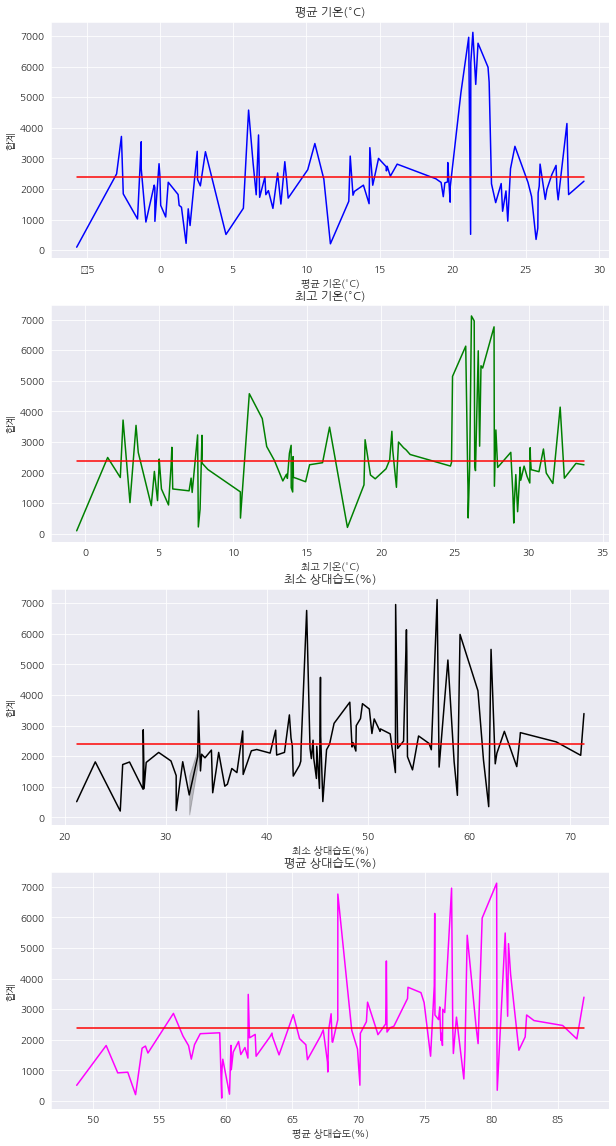

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(10,20)

print('총평균 기온: ', 13.203506)
sns.lineplot(data=h, x='평균 기온(°C)', y='한밭교육박물관', ax=ax1, color='blue')
sns.lineplot(data=h, x='평균 기온(°C)', y='한밭교육박물관평균', ax=ax1, color='red')

print('총평균 최고기온: ', 18.529266)
sns.lineplot(data=h, x='최고 기온(°C)', y='한밭교육박물관', ax=ax2, color='green')
sns.lineplot(data=h, x='최고 기온(°C)',y='한밭교육박물관평균', ax=ax2, color='red')

print('총평균 최소 상대습도: ', 45.090588)
sns.lineplot(data=h, x='최소 상대습도(%)', y='한밭교육박물관', ax=ax3, color='black')
sns.lineplot(data=h, x='최소 상대습도(%)', y='한밭교육박물관평균', ax=ax3, color='red')

print('총평균 평균 상대습도: ', 69.262277)
sns.lineplot(data=h, x='평균 상대습도(%)', y='한밭교육박물관', ax=ax4, color='magenta')
sns.lineplot(data=h, x='평균 상대습도(%)',y='한밭교육박물관평균', ax=ax4, color='red')


sns.set_style('darkgrid')
ax1.set(ylabel="합계", title="평균 기온(°C)")
ax2.set(ylabel="합계", title="최고 기온(°C)")
ax3.set(ylabel="합계", title="최소 상대습도(%)")
ax4.set(ylabel="합계", title="평균 상대습도(%)")

총평균 일강수량:  3.305563
총평균 평균 풍속:  1.560762
총평균 합계 일조시간:  6.642111


[Text(0, 0.5, '합계'), Text(0.5, 1.0, '최소 상대습도(%)')]

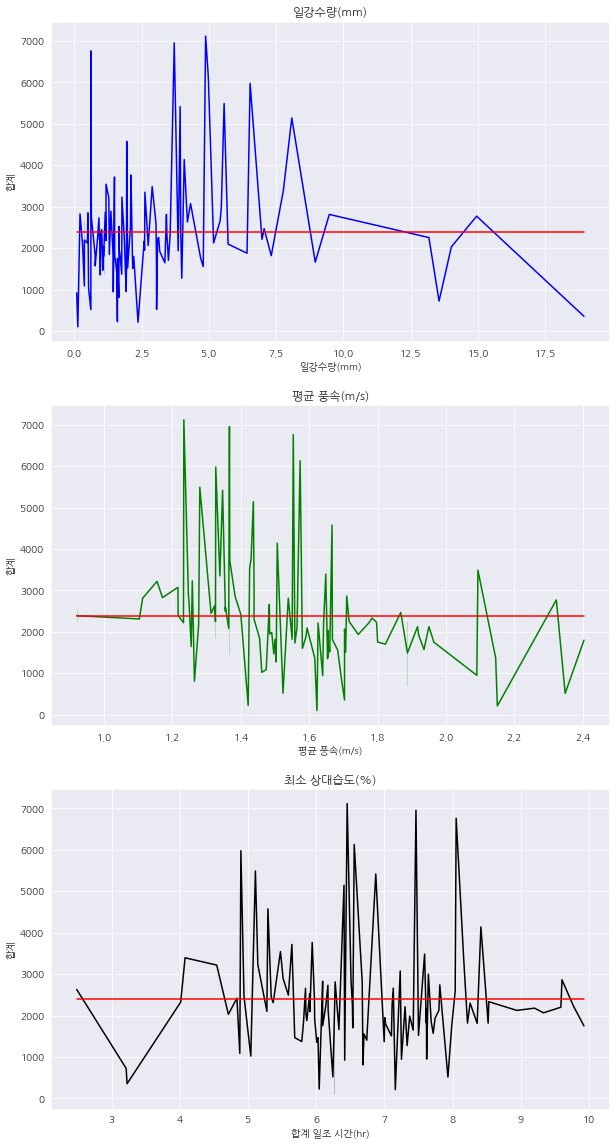

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(10,20)

print('총평균 일강수량: ', 3.305563)
sns.lineplot(data=h, x='일강수량(mm)', y='한밭교육박물관', ax=ax1, color='blue')
sns.lineplot(data=h, x='일강수량(mm)', y='한밭교육박물관평균', ax=ax1, color='red')

print('총평균 평균 풍속: ', 1.560762)
sns.lineplot(data=h, x='평균 풍속(m/s)', y='한밭교육박물관', ax=ax2, color='green')
sns.lineplot(data=h, x='평균 풍속(m/s)', y='한밭교육박물관평균', ax=ax2, color='red')

print('총평균 합계 일조시간: ', 6.642111)
sns.lineplot(data=h, x='합계 일조 시간(hr)', y='한밭교육박물관', ax=ax3, color='black')
sns.lineplot(data=h, x='합계 일조 시간(hr)', y='한밭교육박물관평균', ax=ax3, color='red')

sns.set_style('darkgrid')
ax1.set(ylabel="합계", title='일강수량(mm)')
ax2.set(ylabel="합계", title="평균 풍속(m/s)")
ax3.set(ylabel="합계", title="최소 상대습도(%)")

평균기온 편차비율 시각화
--

In [ ]:
std_tour=h.groupby(['평균 기온(°C)','최고 기온(°C)','최소 상대습도(%)', 
                   '평균 상대습도(%)', '일강수량(mm)','평균 풍속(m/s)',
                   '합계 일조 시간(hr)'])['한밭교육박물관', '한밭교육박물관평균'].mean().reset_index()

In [ ]:
std_tour

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...  합계 일조 시간(hr)  한밭교육박물관    한밭교육박물관평균
0    -5.706452  -0.590323   32.322581  ...      6.258065    100.0  2393.883495
1    -2.977419   1.506452   53.516129  ...      5.590323   2495.0  2393.883495
2    -2.648387   2.548387   49.451613  ...      5.641935   3718.0  2393.883495
3    -2.522581   2.361290   43.354839  ...      5.812903   1841.0  2393.883495
4    -1.548387   3.016129   35.838710  ...      5.038710   1022.0  2393.883495
..         ...        ...         ...  ...           ...      ...          ...
98   27.203226  31.635484   57.032258  ...      7.422581   1647.0  2393.883495
99   27.803226  32.132258   60.870968  ...      8.416129   4140.0  2393.883495
100  27.890323  33.200000   48.419355  ...      8.258065   2302.0  2393.883495
101  27.919355  32.416129   58.516129  ...      8.219355   1819.0  2393.883495
102  28.967742  33.741935   52.935484  ...      7.112903   2256.0  2393.883495

[103 rows x 9 columns]

In [ ]:
print("인덱스 고유개수는", len(std_tour['평균 기온(°C)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['최고 기온(°C)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['최소 상대습도(%)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['평균 상대습도(%)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['일강수량(mm)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['평균 풍속(m/s)'].unique()), "입니다.")
print("인덱스 고유개수는", len(std_tour['합계 일조 시간(hr)'].unique()), "입니다.")

인덱스 고유개수는 103 입니다.
인덱스 고유개수는 103 입니다.
인덱스 고유개수는 101 입니다.
인덱스 고유개수는 103 입니다.
인덱스 고유개수는 101 입니다.
인덱스 고유개수는 97 입니다.
인덱스 고유개수는 102 입니다.


In [ ]:
std_tem=h.groupby(['평균 기온(°C)'])['총평균 기온(°C)','한밭교육박물관','한밭교육박물관평균',].mean().reset_index()

In [ ]:
std_tem

평균 기온(°C)  총평균 기온(°C)  한밭교육박물관    한밭교육박물관평균
0    -5.706452   13.203506    100.0  2393.883495
1    -2.977419   13.203506   2495.0  2393.883495
2    -2.648387   13.203506   3718.0  2393.883495
3    -2.522581   13.203506   1841.0  2393.883495
4    -1.548387   13.203506   1022.0  2393.883495
..         ...         ...      ...          ...
98   27.203226   13.203506   1647.0  2393.883495
99   27.803226   13.203506   4140.0  2393.883495
100  27.890323   13.203506   2302.0  2393.883495
101  27.919355   13.203506   1819.0  2393.883495
102  28.967742   13.203506   2256.0  2393.883495

[103 rows x 4 columns]

In [ ]:
std_tem['평균기온편차비율']=0

for i in range(0,103):
    x2=std_tem['평균 기온(°C)'][i]
    x1=std_tem['총평균 기온(°C)'][i]
    y2=std_tem['한밭교육박물관'][i]
    y1=std_tem['한밭교육박물관평균'][i]

    e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
    
    std_tem['평균기온편차비율'][i]=e
    i+=1

In [ ]:
std_tem['평균기온편차비율'].unique()

array([  0,   1,  -1,  13,  16, -15, 159, -37,  -2,  -5,   4,   2])

[Text(0, 0.5, '평균 기온(°C)'), Text(0.5, 1.0, '평균기온편차비율')]

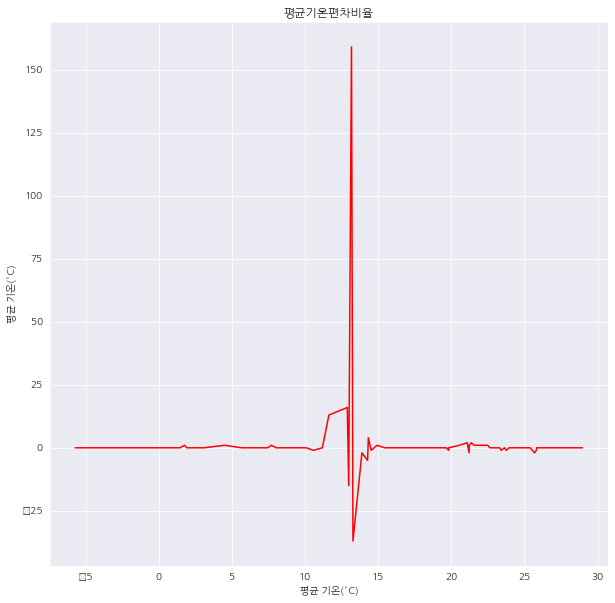

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,10)

sns.lineplot(data=std_tem, x='평균 기온(°C)', y='평균기온편차비율', ax=ax1, color='red')

sns.set_style('darkgrid')
ax1.set(ylabel="평균 기온(°C)", title='평균기온편차비율')

평균기온 증분 값:

평균기온 증분 값 = ((해당 날짜 관광객 수 - 평균 관광객 수) / (해당 날짜 관광객 수 + 평균 관광객 수))/((해당 날짜 평균 온도 - 평균 온도)/(해당 날짜 평균 온도 + 평균 온도)) 

으로 봤을 때 10도에서 15도 사이에서 가장 많은 변화가 일어나는 것을 볼 수 있다.



강수량 편차비율 시각화
--

In [ ]:
h.columns

Index(['한밭교육박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균', '총평균 기온(°C)',
       '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)', '총평균 일강수량(mm)',
       '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '평균기온편차비율'],
      dtype='object')

In [ ]:
std_rain=h.groupby(['일강수량(mm)'])['총평균 일강수량(mm)','한밭교육박물관','한밭교육박물관평균'].mean().reset_index()

In [ ]:
std_rain['일강수량편차비율']=0

for i in range(0,101):
    x2=std_rain['일강수량(mm)'][i]
    x1=std_rain['총평균 일강수량(mm)'][i]
    y2=std_rain['한밭교육박물관'][i]
    y1=std_rain['한밭교육박물관평균'][i]

    e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
    
    std_rain['일강수량편차비율'][i]=e
    i+=1

In [ ]:
std_rain['일강수량편차비율'].unique()

array([  0,   1,   2,  -1,   5,  -2,  16, -20,   4,  -5,   8,  -3])

[Text(0, 0.5, '최고 기온(°C)'), Text(0.5, 1.0, '일강수량편차비율')]

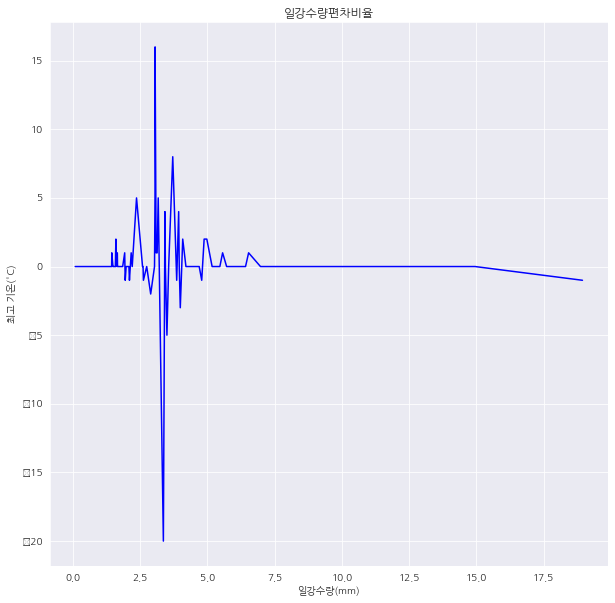

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,10)

sns.lineplot(data=std_rain, x='일강수량(mm)', y='일강수량편차비율', ax=ax1, color='blue')

sns.set_style('darkgrid')
ax1.set(ylabel="최고 기온(°C)", title='일강수량편차비율')

기후별 편차지수 만들어 주기
--

In [ ]:
h

한밭교육박물관  평균 기온(°C)  최고 기온(°C)  ...  총평균 평균 풍속(m/s)  총평균 합계 일조 시간(hr)  평균기온편차비율
0      100.0  -5.706452  -0.590323  ...        1.560762          6.642111         0
1      211.0  11.636667  17.733333  ...        1.560762          6.642111         0
2      226.0   1.771429   7.642857  ...        1.560762          6.642111         0
3      354.0  25.693548  28.990323  ...        1.560762          6.642111         0
4      516.0   4.496774  10.493548  ...        1.560762          6.642111         0
..       ...        ...        ...  ...             ...               ...       ...
98    5980.0  22.410000  26.586667  ...        1.560762          6.642111         0
99    6132.0  21.233333  25.740000  ...        1.560762          6.642111         0
100   6763.0  21.726667  27.656667  ...        1.560762          6.642111         0
101   6957.0  21.090000  26.313333  ...        1.560762          6.642111         0
102   7119.0  21.373333  26.126667  ...        1.560762          6.642111         0

[103 rows x 17 columns]

In [ ]:
h.columns

Index(['한밭교육박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균', '총평균 기온(°C)',
       '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)', '총평균 일강수량(mm)',
       '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '평균기온편차비율'],
      dtype='object')

In [ ]:
std_h=h.groupby([ '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)'])['총평균 기온(°C)',
       '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)', '총평균 일강수량(mm)',
       '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)','한밭교육박물관','한밭교육박물관평균'].mean().reset_index()

In [ ]:
std_h

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...  일강수량편차비율  평균풍속편차비율  합계일조시간편차비율
0    -5.706452  -0.590323   32.322581  ...         0         0           0
1    -2.977419   1.506452   53.516129  ...         0         0           0
2    -2.648387   2.548387   49.451613  ...         0         0           0
3    -2.522581   2.361290   43.354839  ...         0         0           0
4    -1.548387   3.016129   35.838710  ...         0         0           0
..         ...        ...         ...  ...       ...       ...         ...
98   27.203226  31.635484   57.032258  ...         0         0           0
99   27.803226  32.132258   60.870968  ...         0         0           0
100  27.890323  33.200000   48.419355  ...         0         0           0
101  27.919355  32.416129   58.516129  ...         0         0           0
102  28.967742  33.741935   52.935484  ...         0         0           0

[103 rows x 23 columns]

In [ ]:
std_h['평균기온편차비율']=0
std_h['최고기온편차비율']=0
std_h['최소상대습도편차비율']=0
std_h['평균상대습도편차비율']=0
std_h['일강수량편차비율']=0
std_h['평균풍속편차비율']=0
std_h['합계일조시간편차비율']=0

In [ ]:
std_h.iloc[0, 16]

0

In [ ]:
for i in range(0,7):
    for j in range(0,103):
        x2=std_h.iloc[j, i]
        x1=std_h.iloc[j, i+7]
        y2=std_h['한밭교육박물관'][j]
        y1=std_h['한밭교육박물관평균'][j]
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        std_h.iloc[j, i+16]=e
        j+=1
    i+=1

In [ ]:
std_h['관광추천지수']=0
std_h['관광추천지수']=(std_h['평균기온편차비율']+std_h['최고기온편차비율']+std_h['최소상대습도편차비율']+std_h['평균상대습도편차비율']+std_h['일강수량편차비율']+std_h['평균풍속편차비율']+std_h['합계일조시간편차비율'])/7

In [ ]:
std_h

평균 기온(°C)  최고 기온(°C)  최소 상대습도(%)  ...   평균풍속편차비율  합계일조시간편차비율    관광추천지수
0    -5.706452  -0.590323   32.322581  ... -47.365170   30.896339  0.534883
1    -2.977419   1.506452   53.516129  ...  -0.292843   -0.240545 -0.004822
2    -2.648387   2.548387   49.451613  ...  -3.286961   -2.660825  0.668142
3    -2.522581   2.361290   43.354839  ...   1.603941    1.960979  2.310001
4    -1.548387   3.016129   35.838710  ...  12.201598    2.925804  3.709229
..         ...        ...         ...  ...        ...         ...       ...
98   27.203226  31.635484   57.032258  ...   1.701120   -3.330817 -4.067292
99   27.803226  32.132258   60.870968  ... -15.092562    2.268392 -0.491990
100  27.890323  33.200000   48.419355  ...   0.480860   -0.180419 -0.205424
101  27.919355  32.416129   58.516129  ...   6.873816   -1.285770  0.068463
102  28.967742  33.741935   52.935484  ...  -0.313297   -0.866367 -0.461748

[103 rows x 24 columns]

In [ ]:
std_h1=pd.concat([df_22[['year_month']], std_h], axis=1)
std_h1=std_h1.dropna()
std_h1

year_month  평균 기온(°C)  최고 기온(°C)  ...   평균풍속편차비율  합계일조시간편차비율    관광추천지수
0        201101  -5.706452  -0.590323  ... -47.365170   30.896339  0.534883
1        201102  -2.977419   1.506452  ...  -0.292843   -0.240545 -0.004822
2        201103  -2.648387   2.548387  ...  -3.286961   -2.660825  0.668142
3        201104  -2.522581   2.361290  ...   1.603941    1.960979  2.310001
4        201107  -1.548387   3.016129  ...  12.201598    2.925804  3.709229
..          ...        ...        ...  ...        ...         ...       ...
98       201906  27.203226  31.635484  ...   1.701120   -3.330817 -4.067292
99       201907  27.803226  32.132258  ... -15.092562    2.268392 -0.491990
100      201908  27.890323  33.200000  ...   0.480860   -0.180419 -0.205424
101      201909  27.919355  32.416129  ...   6.873816   -1.285770  0.068463
102      201910  28.967742  33.741935  ...  -0.313297   -0.866367 -0.461748

[103 rows x 25 columns]

[Text(0, 0.5, '관광추천지수'), Text(0.5, 1.0, '기후에따른관광추천지수')]

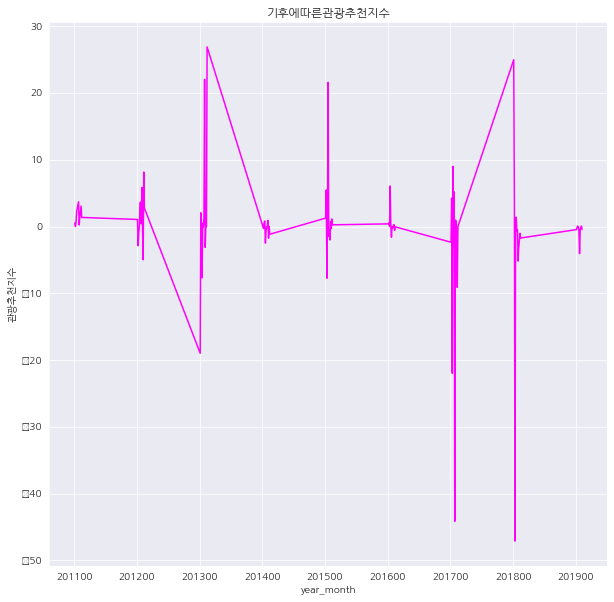

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,10)

sns.lineplot(data=std_h1, x='year_month', y='관광추천지수', ax=ax1, color='magenta')

sns.set_style('darkgrid')
ax1.set(ylabel="관광추천지수", title='기후에따른관광추천지수')

한밭교육박물관은 2013년 초반과 2017년 말에 관광추천지수가 가장 높은 것을 확인 할 수 있다.

2011~2019년까지 데이터가 전부 있는 관광지들 상대로 관광추천 해주기
--

날짜 데이터가 날라가서 다시 불러옵니다.
--

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df1112=pd.read_csv('대전지방기상청(11-12).csv', parse_dates=['일시'])
df1314=pd.read_csv('대전지방기상청(13-14).csv', parse_dates=['일시'])
df1516=pd.read_csv('대전지방기상청(15-16).csv', parse_dates=['일시'])
df1718=pd.read_csv('대전지방기상청(17-18).csv', parse_dates=['일시'])
df1920=pd.read_csv('대전지방기상청(19-20).csv', parse_dates=['일시'])

In [ ]:
#df1112=df1112[['일시']]
#df3114=df1314[['일시']]
#df5116=df1516[['일시']]
#df1718=df1718[['일시']]
#df1920=df1920[['일시']]

In [ ]:
daejeonweather=pd.concat([df1112, df1314, df1516, df1718, df1920], axis=0)
daejeonweather=daejeonweather.loc[daejeonweather['지점명']=='대전']

In [ ]:
daejeonweather=daejeonweather[['일시']]

In [ ]:
daejeonweather['time'] = daejeonweather['일시'].dt.strftime('%Y%m%d')
daejeonweather['year_month'] = daejeonweather['일시'].dt.strftime('%Y%m')
daejeonweather['month_day'] = daejeonweather['일시'].dt.strftime('%m%d')
daejeonweather['year'] = daejeonweather['일시'].dt.strftime('%Y')
daejeonweather['month']=daejeonweather['일시'].dt.strftime('%m')

daejeonweather['time']=daejeonweather['time'].astype(int) 
daejeonweather['year_month']=daejeonweather['year_month'].astype(int)
daejeonweather['month_day']=daejeonweather['month_day'].astype(int) 
daejeonweather['year']=daejeonweather['year'].astype(int) 
daejeonweather['month']=daejeonweather['month'].astype(int)

In [ ]:
daejeonweather

일시      time  year_month  month_day  year  month
0   2011-01-01  20110101      201101        101  2011      1
1   2011-01-02  20110102      201101        102  2011      1
2   2011-01-03  20110103      201101        103  2011      1
3   2011-01-04  20110104      201101        104  2011      1
4   2011-01-05  20110105      201101        105  2011      1
..         ...       ...         ...        ...   ...    ...
726 2020-12-27  20201227      202012       1227  2020     12
727 2020-12-28  20201228      202012       1228  2020     12
728 2020-12-29  20201229      202012       1229  2020     12
729 2020-12-30  20201230      202012       1230  2020     12
730 2020-12-31  20201231      202012       1231  2020     12

[3653 rows x 6 columns]

In [ ]:
daejeonweather=daejeonweather.groupby(['year_month'])['year','month'].mean().reset_index()

In [ ]:
#daejeonweather.to_csv('대전날씨.csv')

In [ ]:
daejeonweather

year_month  year  month
0        201101  2011      1
1        201102  2011      2
2        201103  2011      3
3        201104  2011      4
4        201105  2011      5
..          ...   ...    ...
115      202008  2020      8
116      202009  2020      9
117      202010  2020     10
118      202011  2020     11
119      202012  2020     12

[120 rows x 3 columns]

In [ ]:
df_21=daejeonweather.iloc[:-12, :]

In [ ]:
#df_22.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_22=pd.concat([df_21, df_22], axis=1)
df_22=df_22.dropna()
df_22

year_month  year  month  ...   일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
0        201101  2011      1  ...   0.129032    1.622581      6.258065
1        201102  2011      2  ...   1.600000    1.421429      6.042857
2        201103  2011      3  ...   0.612903    2.348387      7.932258
3        201104  2011      4  ...   2.366667    2.150000      7.160000
4        201105  2011      5  ...  18.945161    1.703226      3.222581
..          ...   ...    ...  ...        ...         ...           ...
100      201905  2019      5  ...   3.364516    1.254839      7.422581
101      201906  2019      6  ...   5.566667    1.280000      5.106667
102      201907  2019      7  ...   3.422581    1.112903      6.674194
103      201908  2019      8  ...   3.133333    0.920000      6.530000
104      201909  2019      9  ...   0.870968    1.103226      5.367742

[105 rows x 18 columns]

In [ ]:
df_22.columns

Index(['year_month', 'year', 'month', 'Unnamed: 0', '한밭교육박물관', '대전오월드',
       '계룡산 수통골', '국립중앙과학관', '지질박물관', '유성유스호스텔', '화폐박물관', '평균 기온(°C)',
       '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)',
       '합계 일조 시간(hr)'],
      dtype='object')

In [ ]:
df_2=df_22.groupby(['year_month','year','month','한밭교육박물관','대전오월드','계룡산 수통골','국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관'])[ '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)'].mean().reset_index()

2011-2019년까지 있는 데이터로 관광지 추천
--

In [ ]:
df_2

year_month  year  month  ...   일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
0        201101  2011      1  ...   0.129032    1.622581      6.258065
1        201102  2011      2  ...   1.600000    1.421429      6.042857
2        201103  2011      3  ...   0.612903    2.348387      7.932258
3        201104  2011      4  ...   2.366667    2.150000      7.160000
4        201105  2011      5  ...  18.945161    1.703226      3.222581
..          ...   ...    ...  ...        ...         ...           ...
100      201905  2019      5  ...   3.364516    1.254839      7.422581
101      201906  2019      6  ...   5.566667    1.280000      5.106667
102      201907  2019      7  ...   3.422581    1.112903      6.674194
103      201908  2019      8  ...   3.133333    0.920000      6.530000
104      201909  2019      9  ...   0.870968    1.103226      5.367742

[105 rows x 17 columns]

In [ ]:
df_22_1=pd.DataFrame(df_2.mean(), columns=['평균']).transpose()

In [ ]:
df_22_1

year_month         year     month  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
평균  201494.942857  2014.885714  6.371429  ...  3.333882    1.560654      6.648701

[1 rows x 17 columns]

In [ ]:
df_2['한밭교육박물관평균']=0
df_2['대전오월드평균']=0
df_2['계룡산 수통골평균']=0
df_2['국립중앙과학관평균']=0
df_2['지질박물관평균']=0
df_2['유성유스호스텔평균']=0
df_2['화폐박물관평균']=0
df_2['총평균 기온(°C)']=0
df_2['총평균 최고 기온(°C)']=0
df_2['총평균 최소 상대습도(%)']=0
df_2['총평균 평균 상대습도(%)']=0
df_2['총평균 일강수량(mm)']=0
df_2['총평균 평균 풍속(m/s)']=0
df_2['총평균 합계 일조 시간(hr)']=0

In [ ]:
df_2['한밭교육박물관평균']=df_22_1['한밭교육박물관'][0]
df_2['대전오월드평균']=df_22_1['대전오월드'][0]
df_2['계룡산 수통골평균']=df_22_1['계룡산 수통골'][0]
df_2['국립중앙과학관평균']=df_22_1['국립중앙과학관'][0]
df_2['지질박물관평균']=df_22_1['지질박물관'][0]
df_2['유성유스호스텔평균']=df_22_1['유성유스호스텔'][0]
df_2['화폐박물관평균']=df_22_1['화폐박물관'][0]

df_2['총평균 기온(°C)']=df_22_1['평균 기온(°C)'][0]
df_2['총평균 최고 기온(°C)']=df_22_1['최고 기온(°C)'][0]
df_2['총평균 최소 상대습도(%)']=df_22_1['최소 상대습도(%)'][0]
df_2['총평균 평균 상대습도(%)']=df_22_1['평균 상대습도(%)'][0]
df_2['총평균 일강수량(mm)']=df_22_1['일강수량(mm)'][0]
df_2['총평균 평균 풍속(m/s)']=df_22_1['평균 풍속(m/s)'][0]
df_2['총평균 합계 일조 시간(hr)']=df_22_1['합계 일조 시간(hr)'][0]

In [ ]:
df_2['한밭교육박물관 관광추천지수']=0
df_2['대전오월드 관광추천지수']=0
df_2['계룡산 수통골 관광추천지수']=0
df_2['국립중앙과학관 관광추천지수']=0
df_2['지질박물관 관광추천지수']=0
df_2['유성유스호스텔 관광추천지수']=0
df_2['화폐박물관 관광추천지수']=0

In [ ]:
df_2

year_month  year  month  ...  지질박물관 관광추천지수  유성유스호스텔 관광추천지수  화폐박물관 관광추천지수
0        201101  2011      1  ...             0               0             0
1        201102  2011      2  ...             0               0             0
2        201103  2011      3  ...             0               0             0
3        201104  2011      4  ...             0               0             0
4        201105  2011      5  ...             0               0             0
..          ...   ...    ...  ...           ...             ...           ...
100      201905  2019      5  ...             0               0             0
101      201906  2019      6  ...             0               0             0
102      201907  2019      7  ...             0               0             0
103      201908  2019      8  ...             0               0             0
104      201909  2019      9  ...             0               0             0

[105 rows x 38 columns]

In [ ]:
df_2.columns

Index(['year_month', 'year', 'month', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균',
       '대전오월드평균', '계룡산 수통골평균', '국립중앙과학관평균', '지질박물관평균', '유성유스호스텔평균', '화폐박물관평균',
       '총평균 기온(°C)', '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)',
       '총평균 일강수량(mm)', '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '한밭교육박물관 관광추천지수',
       '대전오월드 관광추천지수', '계룡산 수통골 관광추천지수', '국립중앙과학관 관광추천지수', '지질박물관 관광추천지수',
       '유성유스호스텔 관광추천지수', '화폐박물관 관광추천지수'],
      dtype='object')

In [ ]:
def tour_index(x1,x2,y1,y2):
    e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
    e=pd.DataFrame(e, columns=['편차'])
    return e

한밭교육박물관

In [ ]:
df_2.columns

Index(['year_month', 'year', 'month', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균',
       '대전오월드평균', '계룡산 수통골평균', '국립중앙과학관평균', '지질박물관평균', '유성유스호스텔평균', '화폐박물관평균',
       '총평균 기온(°C)', '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)',
       '총평균 일강수량(mm)', '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '한밭교육박물관 관광추천지수',
       '대전오월드 관광추천지수', '계룡산 수통골 관광추천지수', '국립중앙과학관 관광추천지수', '지질박물관 관광추천지수',
       '유성유스호스텔 관광추천지수', '화폐박물관 관광추천지수'],
      dtype='object')

In [ ]:
x1=df_2['총평균 기온(°C)']
x2=df_2['평균 기온(°C)']
y1=df_2['한밭교육박물관평균']
y2=df_2['한밭교육박물관']

In [ ]:
a=tour_index(x1,x2,y1,y2)

In [ ]:
x1=df_2['총평균 최고 기온(°C)']
x2=df_2['최고 기온(°C)']
y1=df_2['한밭교육박물관평균']
y2=df_2['한밭교육박물관']

In [ ]:
b=tour_index(x1,x2,y1,y2)

In [ ]:
x2=df_2[ '최소 상대습도(%)']
x1=df_2[ '총평균 최소 상대습도(%)']
y2=df_2['한밭교육박물관']
y1=df_2['한밭교육박물관평균']

In [ ]:
c=tour_index(x1,x2,y1,y2)

In [ ]:
x2=df_2[ '평균 상대습도(%)']
x1=df_2[ '총평균 평균 상대습도(%)']
y2=df_2['한밭교육박물관']
y1=df_2['한밭교육박물관평균']

In [ ]:
d=tour_index(x1,x2,y1,y2)

In [ ]:
x2=df_2[ '일강수량(mm)']
x1=df_2[  '총평균 일강수량(mm)']
y2=df_2['한밭교육박물관']
y1=df_2['한밭교육박물관평균']

In [ ]:
e=tour_index(x1,x2,y1,y2)

In [ ]:
x2=df_2[ '평균 풍속(m/s)']
x1=df_2[   '총평균 평균 풍속(m/s)']
y2=df_2['한밭교육박물관']
y1=df_2['한밭교육박물관평균']

In [ ]:
f=tour_index(x1,x2,y1,y2)

In [ ]:
x2=df_2[ '합계 일조 시간(hr)']
x1=df_2[   '총평균 합계 일조 시간(hr)']
y2=df_2['한밭교육박물관']
y1=df_2['한밭교육박물관평균']

In [ ]:
g=tour_index(x1,x2,y1,y2)

In [ ]:
hi=(a+b+c+d+e+f+g)/7

In [ ]:
df_2['한밭교육박물관 관광추천지수']=hi

대전오월드

In [ ]:
y1=df_2['대전오월드평균']
y2=df_2['대전오월드']

a1=df_2['총평균 기온(°C)']
a2=df_2['평균 기온(°C)']

a=tour_index(a1,a2,y1,y2)

b1=df_2['총평균 최고 기온(°C)']
b2=df_2['최고 기온(°C)']

b=tour_index(b1,b2,y1,y2)

c1=df_2[ '총평균 최소 상대습도(%)']
c2=df_2[  '최소 상대습도(%)']

c=tour_index(c1,c2,y1,y2)

d1=df_2[ '총평균 평균 상대습도(%)']
d2=df_2[ '평균 상대습도(%)']

d=tour_index(d1,d2,y1,y2)

e1=df_2[  '총평균 일강수량(mm)']
e2=df_2[ '일강수량(mm)']

e=tour_index(e1,e2,y1,y2)

f1=df_2[   '총평균 평균 풍속(m/s)']
f2=df_2[ '평균 풍속(m/s)']

f=tour_index(f1,f2,y1,y2)

g1=df_2[   '총평균 합계 일조 시간(hr)']
g2=df_2[ '합계 일조 시간(hr)']

g=tour_index(g1,g2,y1,y2)

hi=(a+b+c+d+e+f+g)/7

df_2['대전오월드 관광추천지수']=hi

계룡산 수통골 관광추천지수

In [ ]:
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    
    def output_index(y1,y2):
        a1=df_2['총평균 기온(°C)']
        a2=df_2['평균 기온(°C)']
        a=Input.tour_index(a1,a2,y1,y2)
        b1=df_2['총평균 최고 기온(°C)']
        b2=df_2['최고 기온(°C)']
        b=Input.tour_index(b1,b2,y1,y2)
        c1=df_2[ '총평균 최소 상대습도(%)']
        c2=df_2[  '최소 상대습도(%)']
        c=Input.tour_index(c1,c2,y1,y2)
        d1=df_2[ '총평균 평균 상대습도(%)']
        d2=df_2[ '평균 상대습도(%)']
        d=Input.tour_index(d1,d2,y1,y2)
        e1=df_2[  '총평균 일강수량(mm)']
        e2=df_2[ '일강수량(mm)']
        e=Input.tour_index(e1,e2,y1,y2)
        f1=df_2[   '총평균 평균 풍속(m/s)']
        f2=df_2[ '평균 풍속(m/s)']
        f=Input.tour_index(f1,f2,y1,y2)
        g1=df_2[   '총평균 합계 일조 시간(hr)']
        g2=df_2[ '합계 일조 시간(hr)']
        g=Input.tour_index(g1,g2,y1,y2)
        hi=(a+b+c+d+e+f+g)/7
        return hi

In [ ]:
y1=df_2['계룡산 수통골평균']
y2=df_2['계룡산 수통골']

In [ ]:
df_2['계룡산 수통골 관광추천지수']=Input.output_index(y1,y2)

국립중앙과학관

In [ ]:
y1=df_2['국립중앙과학관평균']
y2=df_2['국립중앙과학관']

In [ ]:
df_2['국립중앙과학관 관광추천지수']=Input.output_index(y1,y2)

지질박물관

In [ ]:
y1=df_2['지질박물관평균']
y2=df_2['지질박물관']

In [ ]:
df_2['지질박물관 관광추천지수']=Input.output_index(y1,y2)

유성유스호스텔

In [ ]:
y1=df_2['유성유스호스텔평균']
y2=df_2['유성유스호스텔']

In [ ]:
df_2['유성유스호스텔 관광추천지수']=Input.output_index(y1,y2)

화폐박물관

In [ ]:
y1=df_2['화폐박물관평균']
y2=df_2['화폐박물관']

In [ ]:
df_2['화폐박물관 관광추천지수']=Input.output_index(y1,y2)

2011-2019년 까지 있는 관광지 타겟으로 관광추천지수 시각화
--

2011-2019년까지 있는 데이터 프레임

In [ ]:
#df_2.to_csv('2011-2019대전관광추천.csv')

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
#df_2=pd.read_csv('2011-2019대전관광추천.csv')

Input 클래스는 구하고자하는 관광지 관광객(y2)와 관광지 관광객 평균(y1)을 넣어주면 관광추천지수가 나타난다.

In [ ]:
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    
    def output_index(y1,y2):
        a1=df_2['총평균 기온(°C)']
        a2=df_2['평균 기온(°C)']
        a=Input.tour_index(a1,a2,y1,y2)
        b1=df_2['총평균 최고 기온(°C)']
        b2=df_2['최고 기온(°C)']
        b=Input.tour_index(b1,b2,y1,y2)
        c1=df_2[ '총평균 최소 상대습도(%)']
        c2=df_2[  '최소 상대습도(%)']
        c=Input.tour_index(c1,c2,y1,y2)
        d1=df_2[ '총평균 평균 상대습도(%)']
        d2=df_2[ '평균 상대습도(%)']
        d=Input.tour_index(d1,d2,y1,y2)
        e1=df_2[  '총평균 일강수량(mm)']
        e2=df_2[ '일강수량(mm)']
        e=Input.tour_index(e1,e2,y1,y2)
        f1=df_2[   '총평균 평균 풍속(m/s)']
        f2=df_2[ '평균 풍속(m/s)']
        f=Input.tour_index(f1,f2,y1,y2)
        g1=df_2[   '총평균 합계 일조 시간(hr)']
        g2=df_2[ '합계 일조 시간(hr)']
        g=Input.tour_index(g1,g2,y1,y2)
        hi=(a+b+c+d+e+f+g)/7
        return hi

weahter_go 클래스는 관광추천지수가 전부 있다는 가정하에 알고자 하는 년도(year)와 월(month)을 넣어주면 관광추천지수가 가장 높은 순으로 데이터프레임을 만들어 준다.

- 후반부 작업에서는 recommend_tour 함수 위에 model_tour 함수를 넣어줌으로써,

- 2011년부터 2019년 까지 날짜중 랜덤으로 input으로 받으면 linear 모델이 -2011-2019년까지 학습한 내용을 바탕으로 input 관광지 년-월 데이터를 가지고
관광객수(output)을 예측하고 이를 바탕으로 추천해주는 방식으로 넘길 예정이다.

In [ ]:
class weather_go:
    def recommend_tour(year, month):
        df_year=df_2.loc[df_2['year']==year]
        df_month=df_year.loc[df_year['month']==month]
        
        r1=df_month['한밭교육박물관 관광추천지수']
        r2=df_month['대전오월드 관광추천지수']
        r3=df_month[ '계룡산 수통골 관광추천지수']
        r4=df_month['국립중앙과학관 관광추천지수']
        r5=df_month['지질박물관 관광추천지수']
        r6=df_month['유성유스호스텔 관광추천지수']
        r7=df_month['화폐박물관 관광추천지수']
        
        r1=r1.reset_index()
        r2=r2.reset_index()
        r3=r3.reset_index()
        r4=r4.reset_index()
        r5=r5.reset_index()
        r6=r6.reset_index()
        r7=r7.reset_index()
        
        r1=r1['한밭교육박물관 관광추천지수'][0]
        r2=r2['대전오월드 관광추천지수'][0]
        r3=r3[ '계룡산 수통골 관광추천지수'][0]
        r4=r4['국립중앙과학관 관광추천지수'][0]
        r5=r5['지질박물관 관광추천지수'][0]
        r6=r6['유성유스호스텔 관광추천지수'][0]
        r7=r7['화폐박물관 관광추천지수'][0]
        
        today_recommend=pd.DataFrame(columns=['한밭교육박물관', '대전오월드','계룡산 수통골',
                    '국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관'])
        today_recommend=today_recommend.append({'한밭교육박물관':r1, '대전오월드':r2, '계룡산 수통골':r3,
                                            '국립중앙과학관':r4, '지질박물관':r5, '유성유스호스텔':r6,
                                            '화폐박물관':r7}, ignore_index=True)
        return today_recommend
        
    def today_go(year, month):
        today_recommend=weather_go.recommend_tour(year, month)
        today_1=today_recommend.transpose()
        today_2=today_1.sort_values([0], ascending=False)

        return today_2

In [ ]:
df=weather_go.today_go(2011, 8)

In [ ]:
print("오늘의 관광추천지는 %s, %s, %s 입니다." %(a.index[0], a.index[1], a.index[2]))

오늘의 관광추천지는 대전오월드, 화폐박물관, 국립중앙과학관 입니다.


- 2016년 1월에는 대전 오월드, 화폐박물관, 국립중앙과학관을 추천해줬습니다.

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install konlpy wordcloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class visual:
    def make_list(df):
        this_month=[]
        for i in range(0,7):
            name=a.index[i]
            index=int(a[0][i])
            for j in range(0,index):
                this_month.append(name)
        return this_month
    def make_wordcloud(df):
        this_month=visual.make_list(df)

        text = " ".join(str(each) for each in this_month)
        wordcloud = WordCloud(font_path='NanumGothic', max_words=200,colormap='Set3', background_color="white").generate(text)
        plt.rcParams['font.family'] = 'NanumGothic' 
        plt.figure(figsize=(10,6))
        plt.figure(figsize=(15,10))
        plt.imshow(wordcloud, interpolation='Bilinear')
        plt.axis("off")
        plt.figure(1,figsize=(15, 15))
        plt.show()
    def make_plot(df):
        df=df
        plt.rcParams['font.family'] = 'NanumGothic' 
        figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
        figure.set_size_inches(10,5)
        sns.barplot(data=df, x=df.index, y=df[0], ax=ax1)
        sns.set_style('darkgrid')
        ax1.set(ylabel="관광지추천지수", title="이번달 관광지추천")
        plt.show()

<Figure size 720x432 with 0 Axes>

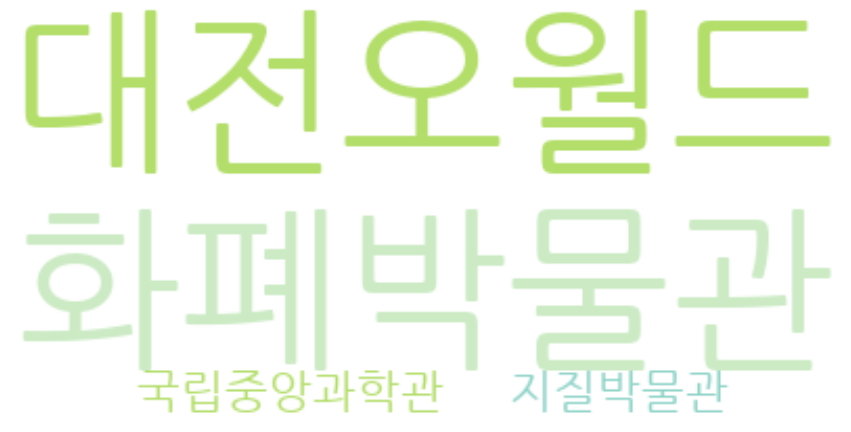

In [ ]:
visual.make_wordcloud(df)

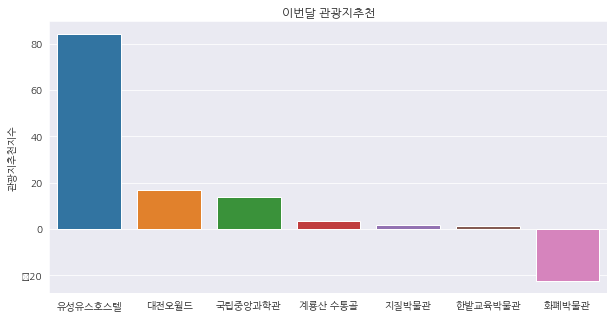

In [ ]:
visual.make_plot(df)

2011-2019년까지 있는 다중선형회귀분석으로 학습시킨 이후 시각화
--

In [ ]:
df_2

year_month  year  month  ...  지질박물관 관광추천지수  유성유스호스텔 관광추천지수  화폐박물관 관광추천지수
0        201101  2011      1  ...     -0.021130        0.007734      0.029639
1        201102  2011      2  ...      2.979356        3.155861      3.138713
2        201103  2011      3  ...     -0.042468       -0.014006     -0.018874
3        201104  2011      4  ...     -0.018497        0.147002     -1.127505
4        201105  2011      5  ...      0.192447       -6.980587      1.724944
..          ...   ...    ...  ...           ...             ...           ...
100      201905  2019      5  ...     -1.678996       -3.774765     -5.839233
101      201906  2019      6  ...     -0.839376       -0.978920     -0.973920
102      201907  2019      7  ...    -21.864520      -11.540774     17.484481
103      201908  2019      8  ...      5.814283       10.175762     11.724999
104      201909  2019      9  ...    -24.755845      -69.874407    -28.139275

[105 rows x 38 columns]

In [ ]:
df_2.columns

Index(['year_month', 'year', 'month', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관', '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균',
       '대전오월드평균', '계룡산 수통골평균', '국립중앙과학관평균', '지질박물관평균', '유성유스호스텔평균', '화폐박물관평균',
       '총평균 기온(°C)', '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)',
       '총평균 일강수량(mm)', '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '한밭교육박물관 관광추천지수',
       '대전오월드 관광추천지수', '계룡산 수통골 관광추천지수', '국립중앙과학관 관광추천지수', '지질박물관 관광추천지수',
       '유성유스호스텔 관광추천지수', '화폐박물관 관광추천지수'],
      dtype='object')

In [ ]:
train=df_2[[ 'year_month', 'year', 'month','평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '한밭교육박물관평균',
       '대전오월드평균', '계룡산 수통골평균', '국립중앙과학관평균', '지질박물관평균', '유성유스호스텔평균', '화폐박물관평균',
       '총평균 기온(°C)', '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)',
       '총평균 일강수량(mm)', '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)']]

In [ ]:
train

year_month  year  month  ...  총평균 일강수량(mm)  총평균 평균 풍속(m/s)  총평균 합계 일조 시간(hr)
0        201101  2011      1  ...      3.333882        1.560654          6.648701
1        201102  2011      2  ...      3.333882        1.560654          6.648701
2        201103  2011      3  ...      3.333882        1.560654          6.648701
3        201104  2011      4  ...      3.333882        1.560654          6.648701
4        201105  2011      5  ...      3.333882        1.560654          6.648701
..          ...   ...    ...  ...           ...             ...               ...
100      201905  2019      5  ...      3.333882        1.560654          6.648701
101      201906  2019      6  ...      3.333882        1.560654          6.648701
102      201907  2019      7  ...      3.333882        1.560654          6.648701
103      201908  2019      8  ...      3.333882        1.560654          6.648701
104      201909  2019      9  ...      3.333882        1.560654          6.648701

[105 rows x 24 columns]

In [ ]:
target=df_2[['한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관']]

In [ ]:
target

한밭교육박물관     대전오월드   계룡산 수통골   국립중앙과학관   지질박물관  유성유스호스텔    화폐박물관
0      100.0    7335.0   25330.0   79251.0  7375.0   1800.0  12515.0
1      226.0   26175.0   34116.0   73591.0  3635.0    953.0   7239.0
2      516.0   65177.0   38547.0   57815.0  2789.0   1405.0   9634.0
3      211.0  171794.0   36226.0  186133.0  6840.0   1765.0  20600.0
4      354.0   50573.0   36967.0   85487.0  7183.0      0.0  23243.0
..       ...       ...       ...       ...     ...      ...      ...
100   1647.0   57721.0   85577.0  158881.0  6209.0   1512.0  10216.0
101   5491.0   66082.0   78944.0  157633.0  2911.0    674.0   5131.0
102   2813.0  148600.0  119600.0  137386.0  4221.0   1447.0  20487.0
103   2258.0   52131.0  107300.0   75532.0  4548.0    899.0   6016.0
104   2312.0   26374.0   72600.0   73972.0  3241.0      0.0   5975.0

[105 rows x 7 columns]

In [ ]:
target.iloc[:, 6]

0      12515.0
1       7239.0
2       9634.0
3      20600.0
4      23243.0
        ...   
100    10216.0
101     5131.0
102    20487.0
103     6016.0
104     5975.0
Name: 화폐박물관, Length: 105, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
reg_all=LinearRegression()

In [ ]:
#def model_tour(train, target):
#    train=train
#    target=target
#    for i in range(0, 7):
#        target=target.iloc[:, i]
#        reg_all.fit(train, target)
#        train_pred=reg_all.predict(train)
#        rmse=np.sqrt(mean_squared_error(train, train_pred))
#        print(i, rmse)

나중에 모델도 적용시키도록 한다.

2014-2019 데이터 있는 관광지 불러오기
--

In [ ]:
df_32

Unnamed: 0  한밭교육박물관     대전오월드  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
0       201401   2827.0   51599.0  ...  0.209677    1.170968      6.093548
1       201402   2103.0   49712.0  ...  0.303571    1.564286      5.275000
2       201403   1510.0   80084.0  ...  2.167742    1.706452      7.103226
3       201404   1521.0  132133.0  ...  1.980000    1.660000      7.500000
4       201405   1750.0  190247.0  ...  1.603226    1.964516      9.929032
..         ...      ...       ...  ...       ...         ...           ...
67      201908   1647.0   57721.0  ...  3.364516    1.254839      7.422581
68      201909   5491.0   66082.0  ...  5.566667    1.280000      5.106667
69      201910   2813.0  148600.0  ...  3.422581    1.112903      6.674194
70      201911   2258.0   52131.0  ...  3.133333    0.920000      6.530000
71      201912   2312.0   26374.0  ...  0.870968    1.103226      5.367742

[72 rows x 17 columns]

In [ ]:
weather_14=daejeonweather.loc[daejeonweather['year']<=2019]
weather_14=weather_14.loc[weather_14['year']>=2014]

In [ ]:
weather_14=weather_14.reset_index()

In [ ]:
df_32.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_32=pd.concat([weather_14, df_32], axis=1)
df_32.drop(['index'], axis=1, inplace=True)

In [ ]:
df_32

year_month  year  month  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
0       201401  2014      1  ...  0.209677    1.170968      6.093548
1       201402  2014      2  ...  0.303571    1.564286      5.275000
2       201403  2014      3  ...  2.167742    1.706452      7.103226
3       201404  2014      4  ...  1.980000    1.660000      7.500000
4       201405  2014      5  ...  1.603226    1.964516      9.929032
..         ...   ...    ...  ...       ...         ...           ...
67      201908  2019      8  ...  3.364516    1.254839      7.422581
68      201909  2019      9  ...  5.566667    1.280000      5.106667
69      201910  2019     10  ...  3.422581    1.112903      6.674194
70      201911  2019     11  ...  3.133333    0.920000      6.530000
71      201912  2019     12  ...  0.870968    1.103226      5.367742

[72 rows x 19 columns]

In [ ]:
df_32_1=pd.DataFrame(df_32.mean(), columns=['평균']).transpose()

In [ ]:
df_32_1

year_month    year  month  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
평균    201656.5  2016.5    6.5  ...   3.10044    1.495771      6.791587

[1 rows x 19 columns]

In [ ]:
df_32['한밭교육박물관평균']=0
df_32['대전오월드평균']=0
df_32['계룡산 수통골평균']=0
df_32['국립중앙과학관평균']=0
df_32['지질박물관평균']=0
df_32['유성유스호스텔평균']=0
df_32['화폐박물관평균']=0
df_32['뿌리공원평균']=0
df_32['대전시립미술관평균']=0
df_32['총평균 기온(°C)']=0
df_32['총평균 최고 기온(°C)']=0
df_32['총평균 최소 상대습도(%)']=0
df_32['총평균 평균 상대습도(%)']=0
df_32['총평균 일강수량(mm)']=0
df_32['총평균 평균 풍속(m/s)']=0
df_32['총평균 합계 일조 시간(hr)']=0

df_32['한밭교육박물관평균']=df_32_1['한밭교육박물관'][0]
df_32['대전오월드평균']=df_32_1['대전오월드'][0]
df_32['계룡산 수통골평균']=df_32_1['계룡산 수통골'][0]
df_32['국립중앙과학관평균']=df_32_1['국립중앙과학관'][0]
df_32['지질박물관평균']=df_32_1['지질박물관'][0]
df_32['유성유스호스텔평균']=df_32_1['유성유스호스텔'][0]
df_32['화폐박물관평균']=df_32_1['화폐박물관'][0]
df_32['뿌리공원평균']=df_32_1['뿌리공원'][0]
df_32['대전시립미술관평균']=df_32_1['대전시립미술관'][0]

df_32['총평균 기온(°C)']=df_32_1['평균 기온(°C)'][0]
df_32['총평균 최고 기온(°C)']=df_32_1['최고 기온(°C)'][0]
df_32['총평균 최소 상대습도(%)']=df_32_1['최소 상대습도(%)'][0]
df_32['총평균 평균 상대습도(%)']=df_32_1['평균 상대습도(%)'][0]
df_32['총평균 일강수량(mm)']=df_32_1['일강수량(mm)'][0]
df_32['총평균 평균 풍속(m/s)']=df_32_1['평균 풍속(m/s)'][0]
df_32['총평균 합계 일조 시간(hr)']=df_32_1['합계 일조 시간(hr)'][0]

df_32['한밭교육박물관 관광추천지수']=0
df_32['대전오월드 관광추천지수']=0
df_32['계룡산 수통골 관광추천지수']=0
df_32['국립중앙과학관 관광추천지수']=0
df_32['지질박물관 관광추천지수']=0
df_32['유성유스호스텔 관광추천지수']=0
df_32['화폐박물관 관광추천지수']=0
df_32['뿌리공원 관광추천지수']=0
df_32['대전시립미술관 관광추천지수']=0

관광추천지수 채워주기

In [ ]:
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    
    def output_index(y1,y2):
        a1=df_32['총평균 기온(°C)']
        a2=df_32['평균 기온(°C)']
        a=Input.tour_index(a1,a2,y1,y2)
        b1=df_32['총평균 최고 기온(°C)']
        b2=df_32['최고 기온(°C)']
        b=Input.tour_index(b1,b2,y1,y2)
        c1=df_32[ '총평균 최소 상대습도(%)']
        c2=df_32[  '최소 상대습도(%)']
        c=Input.tour_index(c1,c2,y1,y2)
        d1=df_32[ '총평균 평균 상대습도(%)']
        d2=df_32[ '평균 상대습도(%)']
        d=Input.tour_index(d1,d2,y1,y2)
        e1=df_32[  '총평균 일강수량(mm)']
        e2=df_32[ '일강수량(mm)']
        e=Input.tour_index(e1,e2,y1,y2)
        f1=df_32[   '총평균 평균 풍속(m/s)']
        f2=df_32[ '평균 풍속(m/s)']
        f=Input.tour_index(f1,f2,y1,y2)
        g1=df_32[   '총평균 합계 일조 시간(hr)']
        g2=df_32[ '합계 일조 시간(hr)']
        g=Input.tour_index(g1,g2,y1,y2)
        hi=(a+b+c+d+e+f+g)/7
        return hi

In [ ]:
df_32.columns

Index(['year_month', 'year', 'month', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관', '뿌리공원', '대전시립미술관', '평균 기온(°C)',
       '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)',
       '합계 일조 시간(hr)', '한밭교육박물관평균', '대전오월드평균', '계룡산 수통골평균', '국립중앙과학관평균',
       '지질박물관평균', '유성유스호스텔평균', '화폐박물관평균', '뿌리공원평균', '대전시립미술관평균', '총평균 기온(°C)',
       '총평균 최고 기온(°C)', '총평균 최소 상대습도(%)', '총평균 평균 상대습도(%)', '총평균 일강수량(mm)',
       '총평균 평균 풍속(m/s)', '총평균 합계 일조 시간(hr)', '한밭교육박물관 관광추천지수', '대전오월드 관광추천지수',
       '계룡산 수통골 관광추천지수', '국립중앙과학관 관광추천지수', '지질박물관 관광추천지수', '유성유스호스텔 관광추천지수',
       '화폐박물관 관광추천지수', '뿌리공원 관광추천지수', '대전시립미술관 관광추천지수'],
      dtype='object')

In [ ]:
a1=df_32['한밭교육박물관평균']
a2=df_32['한밭교육박물관']

df_32['한밭교육박물관 관광추천지수']=Input.output_index(a1,a2)
#
a3=df_32['대전오월드평균']
a4=df_32['대전오월드']

df_32[ '대전오월드 관광추천지수']=Input.output_index(a3,a4)
#
a5=df_32['계룡산 수통골평균']
a6=df_32['계룡산 수통골']

df_32['계룡산 수통골 관광추천지수']=Input.output_index(a5,a6)
#
a7=df_32['계룡산 수통골평균']
a8=df_32['계룡산 수통골']

df_32['계룡산 수통골 관광추천지수']=Input.output_index(a7,a8)
#
a9=df_32['국립중앙과학관평균']
a10=df_32['국립중앙과학관']

df_32['국립중앙과학관 관광추천지수']=Input.output_index(a9,a10)
#
a11=df_32['지질박물관평균']
a12=df_32['지질박물관']

df_32['지질박물관 관광추천지수']=Input.output_index(a11,a12)
#
a13=df_32['유성유스호스텔평균']
a14=df_32['유성유스호스텔']

df_32['유성유스호스텔 관광추천지수']=Input.output_index(a13,a14)
#
a15=df_32['화폐박물관평균']
a16=df_32['화폐박물관']

df_32[ '화폐박물관 관광추천지수']=Input.output_index(a15,a16)
#
a17=df_32['뿌리공원평균']
a18=df_32['뿌리공원']

df_32['뿌리공원 관광추천지수']=Input.output_index(a17,a18)
#
a19=df_32['대전시립미술관평균']
a20=df_32['대전시립미술관']

df_32['대전시립미술관 관광추천지수']=Input.output_index(a19,a20)

In [ ]:
#df_32.to_csv('2014-2019대전관광추천.csv')

2016-2019년 데이터 있는 관광지 불러오기
--

In [ ]:
df_42

In [ ]:
weather_16=daejeonweather.loc[daejeonweather['year']<=2019]
weather_16=weather_16.loc[weather_16['year']>=2016]

In [ ]:
weather_16=weather_16.reset_index()

In [ ]:
df_42.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_42=pd.concat([weather_16, df_42], axis=1)
df_42.drop(['index'], axis=1, inplace=True)

In [ ]:
df_42_1=pd.DataFrame(df_42.mean(), columns=['평균']).transpose()

In [ ]:
df_42_1

year_month    year  month  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
평균    201756.5  2017.5    6.5  ...  3.327911    1.476459      6.907488

[1 rows x 21 columns]

In [ ]:
df_42['한밭교육박물관평균']=0
df_42['대전오월드평균']=0
df_42['계룡산 수통골평균']=0
df_42['국립중앙과학관평균']=0
df_42['지질박물관평균']=0
df_42['유성유스호스텔평균']=0
df_42['화폐박물관평균']=0
df_42['뿌리공원평균']=0
df_42['대전시립미술관평균']=0
df_42['상소오토캠핑장평균']=0
df_42['솔로몬 로파크평균']=0

df_42['총평균 기온(°C)']=0
df_42['총평균 최고 기온(°C)']=0
df_42['총평균 최소 상대습도(%)']=0
df_42['총평균 평균 상대습도(%)']=0
df_42['총평균 일강수량(mm)']=0
df_42['총평균 평균 풍속(m/s)']=0
df_42['총평균 합계 일조 시간(hr)']=0

df_42['한밭교육박물관평균']=df_42_1['한밭교육박물관'][0]
df_42['대전오월드평균']=df_42_1['대전오월드'][0]
df_42['계룡산 수통골평균']=df_42_1['계룡산 수통골'][0]
df_42['국립중앙과학관평균']=df_42_1['국립중앙과학관'][0]
df_42['지질박물관평균']=df_42_1['지질박물관'][0]
df_42['유성유스호스텔평균']=df_42_1['유성유스호스텔'][0]
df_42['화폐박물관평균']=df_42_1['화폐박물관'][0]
df_42['뿌리공원평균']=df_42_1['뿌리공원'][0]
df_42['대전시립미술관평균']=df_42_1['대전시립미술관'][0]
df_42['상소오토캠핑장평균']=df_42_1['상소오토캠핑장'][0]
df_42['솔로몬 로파크평균']=df_42_1['솔로몬 로파크'][0]

df_42['총평균 기온(°C)']=df_42_1['평균 기온(°C)'][0]
df_42['총평균 최고 기온(°C)']=df_42_1['최고 기온(°C)'][0]
df_42['총평균 최소 상대습도(%)']=df_42_1['최소 상대습도(%)'][0]
df_42['총평균 평균 상대습도(%)']=df_42_1['평균 상대습도(%)'][0]
df_42['총평균 일강수량(mm)']=df_42_1['일강수량(mm)'][0]
df_42['총평균 평균 풍속(m/s)']=df_42_1['평균 풍속(m/s)'][0]
df_42['총평균 합계 일조 시간(hr)']=df_42_1['합계 일조 시간(hr)'][0]

df_42['한밭교육박물관 관광추천지수']=0
df_42['대전오월드 관광추천지수']=0
df_42['계룡산 수통골 관광추천지수']=0
df_42['국립중앙과학관 관광추천지수']=0
df_42['지질박물관 관광추천지수']=0
df_42['유성유스호스텔 관광추천지수']=0
df_42['화폐박물관 관광추천지수']=0
df_42['뿌리공원 관광추천지수']=0
df_42['대전시립미술관 관광추천지수']=0
df_42['상소오토캠핑장 관광추천지수']=0
df_42['솔로몬 로파크 관광추천지수']=0

In [ ]:
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    
    def output_index(y1,y2):
        a1=df_42['총평균 기온(°C)']
        a2=df_42['평균 기온(°C)']
        a=Input.tour_index(a1,a2,y1,y2)
        b1=df_42['총평균 최고 기온(°C)']
        b2=df_42['최고 기온(°C)']
        b=Input.tour_index(b1,b2,y1,y2)
        c1=df_42[ '총평균 최소 상대습도(%)']
        c2=df_42[  '최소 상대습도(%)']
        c=Input.tour_index(c1,c2,y1,y2)
        d1=df_42[ '총평균 평균 상대습도(%)']
        d2=df_42[ '평균 상대습도(%)']
        d=Input.tour_index(d1,d2,y1,y2)
        e1=df_42[  '총평균 일강수량(mm)']
        e2=df_42[ '일강수량(mm)']
        e=Input.tour_index(e1,e2,y1,y2)
        f1=df_42[   '총평균 평균 풍속(m/s)']
        f2=df_42[ '평균 풍속(m/s)']
        f=Input.tour_index(f1,f2,y1,y2)
        g1=df_42[   '총평균 합계 일조 시간(hr)']
        g2=df_42[ '합계 일조 시간(hr)']
        g=Input.tour_index(g1,g2,y1,y2)
        hi=(a+b+c+d+e+f+g)/7
        return hi

In [ ]:
a1=df_42['한밭교육박물관평균']
a2=df_42['한밭교육박물관']

df_42['한밭교육박물관 관광추천지수']=Input.output_index(a1,a2)
#
a3=df_42['대전오월드평균']
a4=df_42['대전오월드']

df_42[ '대전오월드 관광추천지수']=Input.output_index(a3,a4)
#
a5=df_42['계룡산 수통골평균']
a6=df_42['계룡산 수통골']

df_42['계룡산 수통골 관광추천지수']=Input.output_index(a5,a6)
#
a7=df_42['계룡산 수통골평균']
a8=df_42['계룡산 수통골']

df_42['계룡산 수통골 관광추천지수']=Input.output_index(a7,a8)
#
a9=df_42['국립중앙과학관평균']
a10=df_42['국립중앙과학관']

df_42['국립중앙과학관 관광추천지수']=Input.output_index(a9,a10)
#
a11=df_42['지질박물관평균']
a12=df_42['지질박물관']

df_42['지질박물관 관광추천지수']=Input.output_index(a11,a12)
#
a13=df_42['유성유스호스텔평균']
a14=df_42['유성유스호스텔']

df_42['유성유스호스텔 관광추천지수']=Input.output_index(a13,a14)
#
a15=df_42['화폐박물관평균']
a16=df_42['화폐박물관']

df_42[ '화폐박물관 관광추천지수']=Input.output_index(a15,a16)
#
a17=df_42['뿌리공원평균']
a18=df_42['뿌리공원']

df_42['뿌리공원 관광추천지수']=Input.output_index(a17,a18)
#
a19=df_42['대전시립미술관평균']
a20=df_42['대전시립미술관']

df_42['대전시립미술관 관광추천지수']=Input.output_index(a19,a20)
#

a21=df_42['상소오토캠핑장평균']
a22=df_42['상소오토캠핑장']

df_42['상소오토캠핑장 관광추천지수']=Input.output_index(a21,a22)

#
a23=df_42['솔로몬 로파크평균']
a24=df_42['솔로몬 로파크']

df_42['솔로몬 로파크 관광추천지수']=Input.output_index(a23,a24)

In [ ]:
#df_42.to_csv('2016-2019대전관광추천.csv')

2017-2019년 데이터 있는 관광지 불러오기
--

In [ ]:
df_52

In [ ]:
weather_17=daejeonweather.loc[daejeonweather['year']<=2019]
weather_17=weather_17.loc[weather_17['year']>=2017]

In [ ]:
weather_17=weather_17.reset_index()

In [ ]:
df_52.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_52=pd.concat([weather_17, df_52], axis=1)
df_52.drop(['index'], axis=1, inplace=True)

In [ ]:
df_52_1=pd.DataFrame(df_52.mean(), columns=['평균']).transpose()

In [ ]:
df_52_1

year_month    year  month  ...  일강수량(mm)  평균 풍속(m/s)  합계 일조 시간(hr)
평균    201806.5  2018.0    6.5  ...  3.320439    1.475437      6.988507

[1 rows x 27 columns]

In [ ]:
df_52_1.columns

Index(['year_month', 'year', 'month', '한밭교육박물관', '대전오월드', '계룡산 수통골', '국립중앙과학관',
       '지질박물관', '유성유스호스텔', '화폐박물관', '뿌리공원', '대전시립미술관', '상소오토캠핑장', '솔로몬 로파크',
       '찬샘마을', '대전 아쿠아월드', '남선공원종합체육관', '장태산자연휴양림', '대전시민천문대', '로하스가족공원 캠핑장',
       '평균 기온(°C)', '최고 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '일강수량(mm)',
       '평균 풍속(m/s)', '합계 일조 시간(hr)'],
      dtype='object')

In [ ]:
df_52['한밭교육박물관평균']=0
df_52['대전오월드평균']=0
df_52['계룡산 수통골평균']=0
df_52['국립중앙과학관평균']=0
df_52['지질박물관평균']=0
df_52['유성유스호스텔평균']=0
df_52['화폐박물관평균']=0
df_52['뿌리공원평균']=0
df_52['대전시립미술관평균']=0
df_52['상소오토캠핑장평균']=0
df_52['솔로몬 로파크평균']=0
df_52['찬샘마을평균']=0
df_52['대전 아쿠아월드평균']=0
df_52['남선공원종합체육관평균']=0
df_52['장태산자연휴양림평균']=0
df_52['대전시민천문대평균']=0
df_52['로하스가족공원 캠핑장평균']=0

df_52['총평균 기온(°C)']=0
df_52['총평균 최고 기온(°C)']=0
df_52['총평균 최소 상대습도(%)']=0
df_52['총평균 평균 상대습도(%)']=0
df_52['총평균 일강수량(mm)']=0
df_52['총평균 평균 풍속(m/s)']=0
df_52['총평균 합계 일조 시간(hr)']=0

df_52['한밭교육박물관평균']=df_52_1['한밭교육박물관'][0]
df_52['대전오월드평균']=df_52_1['대전오월드'][0]
df_52['계룡산 수통골평균']=df_52_1['계룡산 수통골'][0]
df_52['국립중앙과학관평균']=df_52_1['국립중앙과학관'][0]
df_52['지질박물관평균']=df_52_1['지질박물관'][0]
df_52['유성유스호스텔평균']=df_52_1['유성유스호스텔'][0]
df_52['화폐박물관평균']=df_52_1['화폐박물관'][0]
df_52['뿌리공원평균']=df_52_1['뿌리공원'][0]
df_52['대전시립미술관평균']=df_52_1['대전시립미술관'][0]
df_52['상소오토캠핑장평균']=df_52_1['상소오토캠핑장'][0]
df_52['솔로몬 로파크평균']=df_52_1['솔로몬 로파크'][0]
df_52['찬샘마을평균']=df_52_1['찬샘마을'][0]
df_52['대전 아쿠아월드평균']=df_52_1['대전 아쿠아월드'][0]
df_52['남선공원종합체육관평균']=df_52_1['남선공원종합체육관'][0]
df_52['장태산자연휴양림평균']=df_52_1['장태산자연휴양림'][0]
df_52['대전시민천문대평균']=df_52_1['대전시민천문대'][0]
df_52['로하스가족공원 캠핑장평균']=df_52_1['로하스가족공원 캠핑장'][0]

df_52['총평균 기온(°C)']=df_52_1['평균 기온(°C)'][0]
df_52['총평균 최고 기온(°C)']=df_52_1['최고 기온(°C)'][0]
df_52['총평균 최소 상대습도(%)']=df_52_1['최소 상대습도(%)'][0]
df_52['총평균 평균 상대습도(%)']=df_52_1['평균 상대습도(%)'][0]
df_52['총평균 일강수량(mm)']=df_52_1['일강수량(mm)'][0]
df_52['총평균 평균 풍속(m/s)']=df_52_1['평균 풍속(m/s)'][0]
df_52['총평균 합계 일조 시간(hr)']=df_52_1['합계 일조 시간(hr)'][0]

df_52['한밭교육박물관 관광추천지수']=0
df_52['대전오월드 관광추천지수']=0
df_52['계룡산 수통골 관광추천지수']=0
df_52['국립중앙과학관 관광추천지수']=0
df_52['지질박물관 관광추천지수']=0
df_52['유성유스호스텔 관광추천지수']=0
df_52['화폐박물관 관광추천지수']=0
df_52['뿌리공원 관광추천지수']=0
df_52['대전시립미술관 관광추천지수']=0
df_52['상소오토캠핑장 관광추천지수']=0
df_52['솔로몬 로파크 관광추천지수']=0
df_52['찬샘마을 관광추천지수']=0
df_52['대전 아쿠아월드 관광추천지수']=0
df_52['남선공원종합체육관 관광추천지수']=0
df_52['장태산자연휴양림 관광추천지수']=0
df_52['대전시민천문대 관광추천지수']=0
df_52['로하스가족공원 캠핑장 관광추천지수']=0

In [ ]:
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    
    def output_index(y1,y2):
        a1=df_52['총평균 기온(°C)']
        a2=df_52['평균 기온(°C)']
        a=Input.tour_index(a1,a2,y1,y2)
        b1=df_52['총평균 최고 기온(°C)']
        b2=df_52['최고 기온(°C)']
        b=Input.tour_index(b1,b2,y1,y2)
        c1=df_52[ '총평균 최소 상대습도(%)']
        c2=df_52[  '최소 상대습도(%)']
        c=Input.tour_index(c1,c2,y1,y2)
        d1=df_52[ '총평균 평균 상대습도(%)']
        d2=df_52[ '평균 상대습도(%)']
        d=Input.tour_index(d1,d2,y1,y2)
        e1=df_52[  '총평균 일강수량(mm)']
        e2=df_52[ '일강수량(mm)']
        e=Input.tour_index(e1,e2,y1,y2)
        f1=df_52[   '총평균 평균 풍속(m/s)']
        f2=df_52[ '평균 풍속(m/s)']
        f=Input.tour_index(f1,f2,y1,y2)
        g1=df_52[   '총평균 합계 일조 시간(hr)']
        g2=df_52[ '합계 일조 시간(hr)']
        g=Input.tour_index(g1,g2,y1,y2)
        hi=(a+b+c+d+e+f+g)/7
        return hi

In [ ]:
a1=df_52['한밭교육박물관평균']
a2=df_52['한밭교육박물관']

df_52['한밭교육박물관 관광추천지수']=Input.output_index(a1,a2)
#
a3=df_52['대전오월드평균']
a4=df_52['대전오월드']

df_52[ '대전오월드 관광추천지수']=Input.output_index(a3,a4)
#
a5=df_52['계룡산 수통골평균']
a6=df_52['계룡산 수통골']

df_52['계룡산 수통골 관광추천지수']=Input.output_index(a5,a6)
#
a7=df_52['계룡산 수통골평균']
a8=df_52['계룡산 수통골']

df_52['계룡산 수통골 관광추천지수']=Input.output_index(a7,a8)
#
a9=df_52['국립중앙과학관평균']
a10=df_52['국립중앙과학관']

df_52['국립중앙과학관 관광추천지수']=Input.output_index(a9,a10)
#
a11=df_52['지질박물관평균']
a12=df_52['지질박물관']

df_52['지질박물관 관광추천지수']=Input.output_index(a11,a12)
#
a13=df_52['유성유스호스텔평균']
a14=df_52['유성유스호스텔']

df_52['유성유스호스텔 관광추천지수']=Input.output_index(a13,a14)
#
a15=df_52['화폐박물관평균']
a16=df_52['화폐박물관']

df_52[ '화폐박물관 관광추천지수']=Input.output_index(a15,a16)
#
a17=df_52['뿌리공원평균']
a18=df_52['뿌리공원']

df_52['뿌리공원 관광추천지수']=Input.output_index(a17,a18)
#
a19=df_52['대전시립미술관평균']
a20=df_52['대전시립미술관']

df_52['대전시립미술관 관광추천지수']=Input.output_index(a19,a20)
#

a21=df_52['상소오토캠핑장평균']
a22=df_52['상소오토캠핑장']

df_52['상소오토캠핑장 관광추천지수']=Input.output_index(a21,a22)

#
a23=df_52['솔로몬 로파크평균']
a24=df_52['솔로몬 로파크']

df_52['솔로몬 로파크 관광추천지수']=Input.output_index(a23,a24)
#
a25=df_52['찬샘마을평균']
a26=df_52['찬샘마을']

df_52['찬샘마을 관광추천지수']=Input.output_index(a25,a26)
#
a27=df_52['대전 아쿠아월드평균']
a28=df_52['대전 아쿠아월드']

df_52['대전 아쿠아월드 관광추천지수']=Input.output_index(a27,a28)
#
a29=df_52['남선공원종합체육관평균']
a30=df_52['남선공원종합체육관']

df_52['남선공원종합체육관 관광추천지수']=Input.output_index(a29,a30)
#
a31=df_52['장태산자연휴양림평균']
a32=df_52['장태산자연휴양림']

df_52['장태산자연휴양림 관광추천지수']=Input.output_index(a31,a32)
#
a33=df_52['대전시민천문대평균']
a34=df_52['대전시민천문대']

df_52['대전시민천문대 관광추천지수']=Input.output_index(a33,a34)
#
a35=df_52['로하스가족공원 캠핑장평균']
a36=df_52['로하스가족공원 캠핑장']

df_52['로하스가족공원 캠핑장 관광추천지수']=Input.output_index(a35,a36)

In [ ]:
#df_52.to_csv('2017-2019대전관광추천.csv')

기후에 따른 대전 관광지 추천해주기
--

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
#df_2=pd.read_csv('2011-2019대전관광추천.csv')
#df_32=pd.read_csv('2014-2019대전관광추천.csv')
#df_42=pd.read_csv('2016-2019대전관광추천.csv')
#df_52=pd.read_csv('2017-2019대전관광추천.csv')

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install konlpy wordcloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

클래스 전부 가져오기
--

2011년 - 2019년 대전 관광추천 클래스

In [ ]:
class weather_go_2:
    def recommend_tour(year, month):
        df_year=df_2.loc[df_2['year']==year]
        df_month=df_year.loc[df_year['month']==month]
        
        r1=df_month['한밭교육박물관 관광추천지수']
        r2=df_month['대전오월드 관광추천지수']
        r3=df_month[ '계룡산 수통골 관광추천지수']
        r4=df_month['국립중앙과학관 관광추천지수']
        r5=df_month['지질박물관 관광추천지수']
        r6=df_month['유성유스호스텔 관광추천지수']
        r7=df_month['화폐박물관 관광추천지수']
        
        r1=r1.reset_index()
        r2=r2.reset_index()
        r3=r3.reset_index()
        r4=r4.reset_index()
        r5=r5.reset_index()
        r6=r6.reset_index()
        r7=r7.reset_index()
        
        r1=r1['한밭교육박물관 관광추천지수'][0]
        r2=r2['대전오월드 관광추천지수'][0]
        r3=r3[ '계룡산 수통골 관광추천지수'][0]
        r4=r4['국립중앙과학관 관광추천지수'][0]
        r5=r5['지질박물관 관광추천지수'][0]
        r6=r6['유성유스호스텔 관광추천지수'][0]
        r7=r7['화폐박물관 관광추천지수'][0]
        
        today_recommend=pd.DataFrame(columns=['한밭교육박물관', '대전오월드','계룡산 수통골',
                    '국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관'])
        today_recommend=today_recommend.append({'한밭교육박물관':r1, '대전오월드':r2, '계룡산 수통골':r3,
                                            '국립중앙과학관':r4, '지질박물관':r5, '유성유스호스텔':r6,
                                            '화폐박물관':r7}, ignore_index=True)
        return today_recommend
        
    def today_go(year, month):
        today_recommend=weather_go_2.recommend_tour(year, month)
        today_1=today_recommend.transpose()
        today_2=today_1.sort_values([0], ascending=False)

        return today_2

In [ ]:
weather_go_2.today_go(2013,5)

0
계룡산 수통골  0.135956
대전오월드    0.001685
국립중앙과학관 -0.085038
화폐박물관   -0.238996
지질박물관   -0.289586
한밭교육박물관 -0.480967
유성유스호스텔 -1.458730

2014-2019년 대전 관광추천 클래스


In [ ]:
class weather_go_3:
    def recommend_tour(year, month):
        df_year=df_32.loc[df_32['year']==year]
        df_month=df_year.loc[df_year['month']==month]
        
        r1=df_month['한밭교육박물관 관광추천지수']
        r2=df_month['대전오월드 관광추천지수']
        r3=df_month[ '계룡산 수통골 관광추천지수']
        r4=df_month['국립중앙과학관 관광추천지수']
        r5=df_month['지질박물관 관광추천지수']
        r6=df_month['유성유스호스텔 관광추천지수']
        r7=df_month['화폐박물관 관광추천지수']
        r8=df_month['뿌리공원 관광추천지수']
        r9=df_month['대전시립미술관 관광추천지수']

        
        r1=r1.reset_index()
        r2=r2.reset_index()
        r3=r3.reset_index()
        r4=r4.reset_index()
        r5=r5.reset_index()
        r6=r6.reset_index()
        r7=r7.reset_index()
        r8=r8.reset_index()
        r9=r9.reset_index()
        
        r1=r1['한밭교육박물관 관광추천지수'][0]
        r2=r2['대전오월드 관광추천지수'][0]
        r3=r3[ '계룡산 수통골 관광추천지수'][0]
        r4=r4['국립중앙과학관 관광추천지수'][0]
        r5=r5['지질박물관 관광추천지수'][0]
        r6=r6['유성유스호스텔 관광추천지수'][0]
        r7=r7['화폐박물관 관광추천지수'][0]
        r8=r8['뿌리공원 관광추천지수'][0]
        r9=r9['대전시립미술관 관광추천지수'][0]
        
        today_recommend=pd.DataFrame(columns=['한밭교육박물관', '대전오월드','계룡산 수통골',
                    '국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관','뿌리공원','대전시립미술관'])
        today_recommend=today_recommend.append({'한밭교육박물관':r1, '대전오월드':r2, '계룡산 수통골':r3,
                                            '국립중앙과학관':r4, '지질박물관':r5, '유성유스호스텔':r6,
                                            '화폐박물관':r7, '뿌리공원':r8, '대전시립미술관':r9}, ignore_index=True)
        return today_recommend
        
    def today_go(year, month):
        today_recommend=weather_go_3.recommend_tour(year, month)
        today_1=today_recommend.transpose()
        today_2=today_1.sort_values([0], ascending=False)

        return today_2

In [ ]:
weather_go_3.today_go(2017,8)

0
대전시립미술관  2.443256
지질박물관    2.170397
국립중앙과학관  2.094416
계룡산 수통골  1.598776
화폐박물관    1.299911
유성유스호스텔  0.880644
한밭교육박물관  0.617136
대전오월드    0.045804
뿌리공원    -2.055811

2016-2019년 대전 관광추천 클래스

In [ ]:
class weather_go_4:
    def recommend_tour(year, month):
        df_year=df_42.loc[df_42['year']==year]
        df_month=df_year.loc[df_year['month']==month]
        
        r1=df_month['한밭교육박물관 관광추천지수']
        r2=df_month['대전오월드 관광추천지수']
        r3=df_month['계룡산 수통골 관광추천지수']
        r4=df_month['국립중앙과학관 관광추천지수']
        r5=df_month['지질박물관 관광추천지수']
        r6=df_month['유성유스호스텔 관광추천지수']
        r7=df_month['화폐박물관 관광추천지수']
        r8=df_month['뿌리공원 관광추천지수']
        r9=df_month['대전시립미술관 관광추천지수']
        r10=df_month['상소오토캠핑장 관광추천지수']
        r11=df_month['솔로몬 로파크 관광추천지수']

        
        r1=r1.reset_index()
        r2=r2.reset_index()
        r3=r3.reset_index()
        r4=r4.reset_index()
        r5=r5.reset_index()
        r6=r6.reset_index()
        r7=r7.reset_index()
        r8=r8.reset_index()
        r9=r9.reset_index()
        r10=r10.reset_index()
        r11=r11.reset_index()
        
        r1=r1['한밭교육박물관 관광추천지수'][0]
        r2=r2['대전오월드 관광추천지수'][0]
        r3=r3['계룡산 수통골 관광추천지수'][0]
        r4=r4['국립중앙과학관 관광추천지수'][0]
        r5=r5['지질박물관 관광추천지수'][0]
        r6=r6['유성유스호스텔 관광추천지수'][0]
        r7=r7['화폐박물관 관광추천지수'][0]
        r8=r8['뿌리공원 관광추천지수'][0]
        r9=r9['대전시립미술관 관광추천지수'][0]
        r10=r10['상소오토캠핑장 관광추천지수'][0]
        r11=r11['솔로몬 로파크 관광추천지수'][0]
        
        today_recommend=pd.DataFrame(columns=['한밭교육박물관', '대전오월드','계룡산 수통골',
                    '국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관','뿌리공원',
                    '대전시립미술관','상소오토캠핑장','솔로몬 로파크'])
        today_recommend=today_recommend.append({'한밭교육박물관':r1, '대전오월드':r2, '계룡산 수통골':r3,
                                            '국립중앙과학관':r4, '지질박물관':r5, '유성유스호스텔':r6,
                                            '화폐박물관':r7, '뿌리공원':r8, '대전시립미술관':r9, '상소오토캠핑장':r10, '솔로몬 로파크':r11}, ignore_index=True)
        return today_recommend
        
    def today_go(year, month):
        today_recommend=weather_go_4.recommend_tour(year, month)
        today_1=today_recommend.transpose()
        today_2=today_1.sort_values([0], ascending=False)

        return today_2

In [ ]:
weather_go_4.today_go(2018,8)

0
국립중앙과학관  4.960917
대전시립미술관  4.143027
상소오토캠핑장  3.677497
지질박물관    2.998301
화폐박물관    2.746840
유성유스호스텔  2.370017
대전오월드    1.179446
솔로몬 로파크  0.297983
한밭교육박물관 -0.869023
계룡산 수통골 -2.297185
뿌리공원    -3.756551

2017-2019년 대전 관광추천 클래스

In [ ]:
class weather_go_5:
    def recommend_tour(year, month):
        df_year=df_52.loc[df_52['year']==year]
        df_month=df_year.loc[df_year['month']==month]
        
        r1=df_month['한밭교육박물관 관광추천지수']
        r2=df_month['대전오월드 관광추천지수']
        r3=df_month[ '계룡산 수통골 관광추천지수']
        r4=df_month['국립중앙과학관 관광추천지수']
        r5=df_month['지질박물관 관광추천지수']
        r6=df_month['유성유스호스텔 관광추천지수']
        r7=df_month['화폐박물관 관광추천지수']
        r8=df_month['뿌리공원 관광추천지수']
        r9=df_month['대전시립미술관 관광추천지수']
        r10=df_month['상소오토캠핑장 관광추천지수']
        r11=df_month['솔로몬 로파크 관광추천지수']
        r12=df_month['찬샘마을 관광추천지수']
        r13=df_month['대전 아쿠아월드 관광추천지수']
        r14=df_month['남선공원종합체육관 관광추천지수']
        r15=df_month['장태산자연휴양림 관광추천지수']
        r16=df_month['대전시민천문대 관광추천지수']
        r17=df_month['로하스가족공원 캠핑장 관광추천지수']
     
        r1=r1.reset_index()
        r2=r2.reset_index()
        r3=r3.reset_index()
        r4=r4.reset_index()
        r5=r5.reset_index()
        r6=r6.reset_index()
        r7=r7.reset_index()
        r8=r8.reset_index()
        r9=r9.reset_index()
        r10=r10.reset_index()
        r11=r11.reset_index()
        r12=r12.reset_index()
        r13=r13.reset_index()
        r14=r14.reset_index()
        r15=r15.reset_index()
        r16=r16.reset_index()
        r17=r17.reset_index()

        
        r1=r1['한밭교육박물관 관광추천지수'][0]
        r2=r2['대전오월드 관광추천지수'][0]
        r3=r3[ '계룡산 수통골 관광추천지수'][0]
        r4=r4['국립중앙과학관 관광추천지수'][0]
        r5=r5['지질박물관 관광추천지수'][0]
        r6=r6['유성유스호스텔 관광추천지수'][0]
        r7=r7['화폐박물관 관광추천지수'][0]
        r8=r8['뿌리공원 관광추천지수'][0]
        r9=r9['대전시립미술관 관광추천지수'][0]
        r10=r10['상소오토캠핑장 관광추천지수'][0]
        r11=r11['솔로몬 로파크 관광추천지수'][0]
        r12=r12['찬샘마을 관광추천지수'][0]
        r13=r13['대전 아쿠아월드 관광추천지수'][0]
        r14=r14['남선공원종합체육관 관광추천지수'][0]
        r15=r15['장태산자연휴양림 관광추천지수'][0]
        r16=r16['대전시민천문대 관광추천지수'][0]
        r17=r17['로하스가족공원 캠핑장 관광추천지수'][0]
        
        today_recommend=pd.DataFrame(columns=['한밭교육박물관', '대전오월드','계룡산 수통골',
                    '국립중앙과학관','지질박물관','유성유스호스텔','화폐박물관','뿌리공원',
                    '대전시립미술관','상소오토캠핑장','남성공원종합체육관','장태산자연휴양림',
                    '대전시민천문대','로하스가족공원 캠핑장'])
        today_recommend=today_recommend.append({'한밭교육박물관':r1, '대전오월드':r2, '계룡산 수통골':r3,
                                            '국립중앙과학관':r4, '지질박물관':r5, '유성유스호스텔':r6,
                                            '화폐박물관':r7, '뿌리공원':r8, '대전시립미술관':r9, '상소오토캠핑장':r10, 
                                            '솔로몬 로파크':r11, '찬샘마을':r12, '대전 아쿠아월드':r13,
                                            '남선공원종합체육관':r14, '장태산자연휴양림':r15,
                                            '대전시민천문대':r16, '로하스가족공원 캠핑장':r17}, ignore_index=True)
        return today_recommend
        
    def today_go(year, month):
        today_recommend=weather_go_5.recommend_tour(year, month)
        today_1=today_recommend.transpose()
        today_2=today_1.sort_values([0], ascending=False)

        return today_2

In [ ]:
weather_go_5.today_go(2019,8)

0
대전시립미술관       8.055883
상소오토캠핑장       7.212157
대전시민천문대       5.867863
로하스가족공원 캠핑장   5.575292
장태산자연휴양림      5.362769
국립중앙과학관       3.692005
남선공원종합체육관     3.679910
대전 아쿠아월드      1.847805
지질박물관         1.476416
계룡산 수통골       0.947707
화폐박물관         0.493613
유성유스호스텔       0.383259
뿌리공원         -2.661891
솔로몬 로파크      -5.057957
대전오월드        -5.108130
한밭교육박물관      -5.579449
찬샘마을        -11.118266
남성공원종합체육관          NaN

시각화 클래스

In [ ]:
class visual_go:
    def make_list(df):
        this_month=[]
        for i in range(0,7):
            name=a.index[i]
            index=int(a[0][i])
            for j in range(0,index):
                this_month.append(name)
        return this_month
    def make_wordcloud(df):
        this_month=visual.make_list(df)

        text = " ".join(str(each) for each in this_month)
        wordcloud = WordCloud(font_path='NanumGothic', max_words=200,colormap='Set3', background_color="white").generate(text)
        plt.rcParams['font.family'] = 'NanumGothic' 
        plt.figure(figsize=(15,10))
        plt.imshow(wordcloud, interpolation='Bilinear')
        plt.axis("off")
        plt.figure(1,figsize=(15, 10))
        plt.show()
    def make_plot(df):
        df=df
        plt.rcParams['font.family'] = 'NanumGothic' 
        figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
        figure.set_size_inches(20,10)
        sns.barplot(data=df, x=df.index, y=df[0], ax=ax1)
        sns.set_style('darkgrid')
        ax1.set(ylabel="관광지추천지수", title="이번달 관광지추천")
        plt.show()

2011-2019: df2

2014-2019: df32

2016-2019: df42

2017-2019: df52

In [ ]:
def weather_go(year, month):
    year=year
    month=month
    if year<2014:
        print(year, "년", month, "월 추천지입니다.")
        df=weather_go_2.today_go(year,month)
        df=df.dropna()
        visual_go.make_wordcloud(df)
        visual_go.make_plot(df)     
    elif year<2016:
        print(year, "년", month, "월 추천지입니다.")
        df=weather_go_3.today_go(year,month)
        df=df.dropna()
        visual_go.make_wordcloud(df)
        visual_go.make_plot(df)  
    elif year==2016:
        print(year, "년", month, "월 추천지입니다.")
        df=weather_go_4.today_go(year,month)
        df=df.dropna()
        visual_go.make_wordcloud(df)
        visual_go.make_plot(df)  
    elif year>=2017:
        print(year, "년", month, "월 추천지입니다.")
        df=weather_go_5.today_go(year,month)
        df=df.dropna()
        visual_go.make_wordcloud(df)
        visual_go.make_plot(df)  
    else:
        print('검색 결과를 찾을 수 없습니다.')

Weather_Go(대전) 초안 완성
--

첫 번째 값에 년도(2011-2019)를 입력해주고,
두 번째 값에 월(1-12)를 입력해주면, Weather_Go가 해당 년월에 관광지를 추천해줍니다.

ex) 2017년 4월의 대전관광지를 추천 받고 싶다면, weather_go(2017, 4)이렇게 입력하면 됩니다.

2017 년 4 월 추천지입니다.


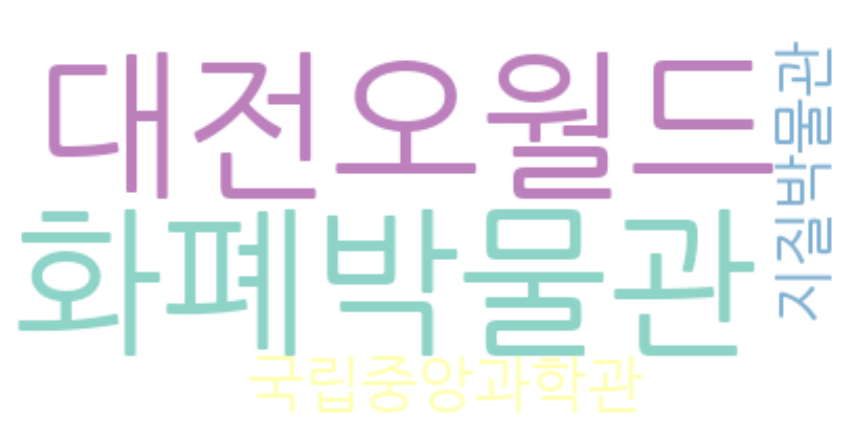

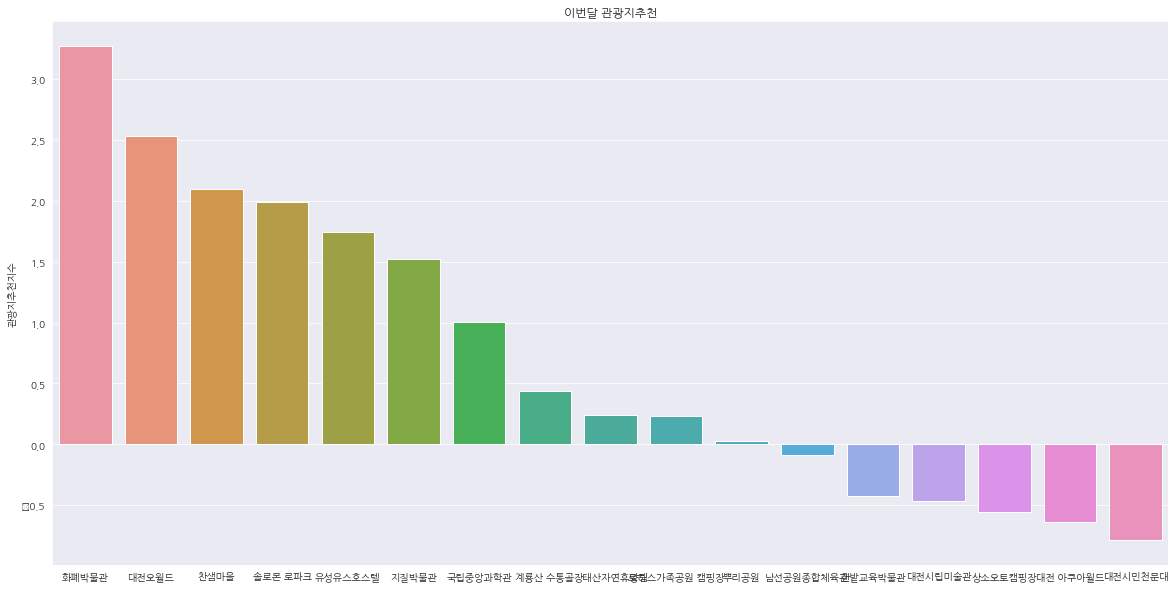

In [ ]:
weather_go(2017, 4)

끝
--